In [1]:
import pandas as pd
import matplotlib.image as mpimg
import os
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Data_Entry_2017.csv')
print(df.shape)

(112120, 12)


In [3]:
df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN


In [4]:
print(df['Finding Labels'].value_counts()[:10])

Finding Labels
No Finding                  60361
Infiltration                 9547
Atelectasis                  4215
Effusion                     3955
Nodule                       2705
Pneumothorax                 2194
Mass                         2139
Effusion|Infiltration        1603
Atelectasis|Infiltration     1350
Consolidation                1310
Name: count, dtype: int64


In [5]:
img_name=df.iloc[0]['Image Index']
img_path=os.path.join('\data\images_001\images',img_name)

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipykernel_1448/48440459.py:2: SyntaxWarning: invalid escape sequence '\d'
  img_path=os.path.join('\data\images_001\images',img_name)


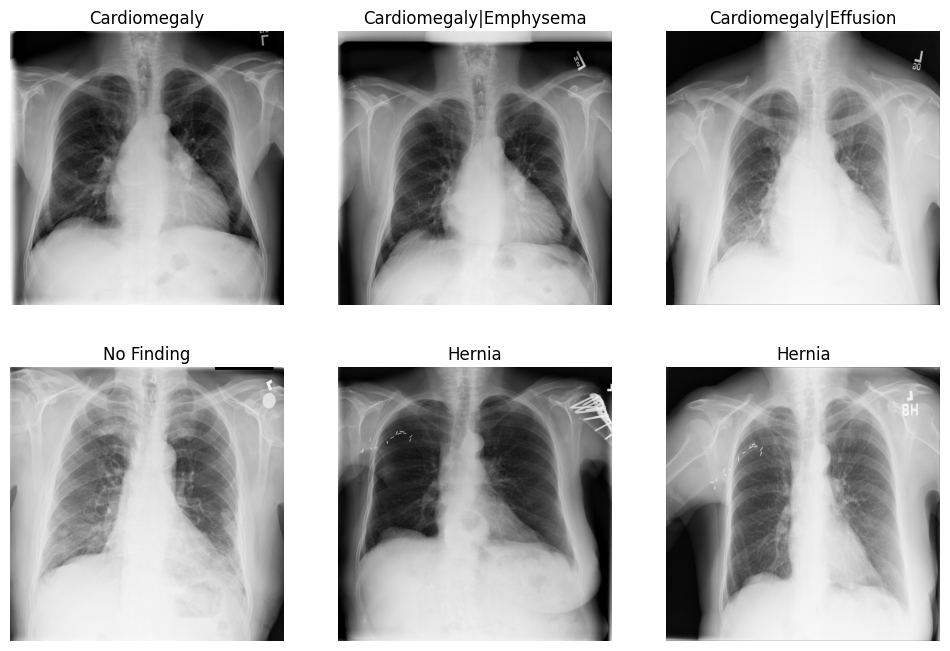

In [6]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
img_folder='data/images_001/images'
for i, ax in enumerate(axes.flat):
    img_name = df.iloc[i]["Image Index"]
    img_path = os.path.join(img_folder, img_name)
    img = mpimg.imread(img_path)
    
    ax.imshow(img, cmap="gray")
    ax.set_title(df.iloc[i]["Finding Labels"])
    ax.axis("off")

In [7]:
root_dir = Path('data')  
df = pd.read_csv("Data_Entry_2017.csv")
image_paths = {p.name: p for p in root_dir.rglob("*.png")}

print("Total images indexed:", len(image_paths))

Total images indexed: 112120


In [5]:
import pandas as pd

# Load CSV metadata
df = pd.read_csv("Data_Entry_2017.csv")

# Split multi-label entries and stack into a single column
all_labels = df["Finding Labels"].str.split("|").explode()

# Count occurrences of each disease
disease_counts = all_labels.value_counts()

print(disease_counts)


Finding Labels
No Finding            60361
Infiltration          19894
Effusion              13317
Atelectasis           11559
Nodule                 6331
Mass                   5782
Pneumothorax           5302
Consolidation          4667
Pleural_Thickening     3385
Cardiomegaly           2776
Emphysema              2516
Edema                  2303
Fibrosis               1686
Pneumonia              1431
Hernia                  227
Name: count, dtype: int64


In [9]:
# encoding: utf-8




# 1. Load NIH ChestX-ray14 CSV
df = pd.read_csv("Data_Entry_2017.csv")

# 2. Define all 14 disease labels
all_labels = [
    'Atelectasis','Cardiomegaly','Effusion','Infiltration','Mass',
    'Nodule','Pneumonia','Pneumothorax','Consolidation','Edema',
    'Emphysema','Fibrosis','Pleural_Thickening','Hernia'
]

# 3. Convert labels ("Effusion|Pneumonia") → multi-hot vector
def encode_labels(label_str):
    vec = [0]*14  # start with all zeros
    if label_str != "No Finding":  # only mark diseases if they exist
        for disease in label_str.split('|'):  # handle multi-disease case
            if disease in all_labels:
                vec[all_labels.index(disease)] = 1
    return vec

# Apply the function to every row
df['labels'] = df['Finding Labels'].apply(encode_labels)





In [10]:
df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11,labels
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]"
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN,"[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]"


In [6]:
import os
import torch
from torch.utils.data import Dataset
from PIL import Image, UnidentifiedImageError
import pandas as pd

class ChestXrayDataset(Dataset):
    def __init__(self, file_list, img_dir, csv_file, transform=None):
        # Read image names from split file
        with open(file_list, "r") as f:
            self.image_names = [line.strip() for line in f.readlines()]

        self.img_dir = img_dir
        self.transform = transform

        # Load labels CSV
        df = pd.read_csv(csv_file)
        self.img2label = dict(zip(df["Image Index"], df["Finding Labels"]))

        # Define classes
        self.classes = [
            "Atelectasis", "Cardiomegaly", "Effusion", "Infiltration", "Mass",
            "Nodule", "Pneumonia", "Pneumothorax", "Consolidation", "Edema",
            "Emphysema", "Fibrosis", "Pleural_Thickening", "Hernia"
        ]

    def __len__(self):
        return len(self.image_names)

    def __getitem__(self, idx):
        img_name = self.image_names[idx]

        # 🔑 Build path by searching subfolders
        img_path = None
        for i in range(1, 13):  # images_001 ... images_012
            candidate = os.path.join(self.img_dir, f"images_{i:03d}", "images", img_name)
            if os.path.exists(candidate):
                img_path = candidate
                break

        if img_path is None:
            raise FileNotFoundError(f"Image {img_name} not found in {self.img_dir}")

        # 🔧 Try loading image
        try:
            image = Image.open(img_path).convert("RGB")
        except UnidentifiedImageError:
            print(f"⚠️ Skipping corrupted image: {img_path}")
            return self.__getitem__((idx + 1) % len(self.image_names))

        # Multi-label vector
        labels_str = self.img2label[img_name].split("|")
        label_vec = [1 if c in labels_str else 0 for c in self.classes]
        label = torch.FloatTensor(label_vec)

        # Apply transforms
        if self.transform:
            image = self.transform(image)

        return image, label


In [8]:
# ===============================
# Stage 2: Dataset & DataLoaders
# ===============================
import os
from torch.utils.data import DataLoader
import torchvision.transforms as transforms

# ===============================
# Transforms
# ===============================
train_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.1, contrast=0.1),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225]),
])

val_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225]),
])

# test_transform kept separate for clarity (same as val_transform)
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225]),
])

# ===============================
# Paths (update to your dataset)
# ===============================
data_dir   = r"/home/prem/PROJECT DATA/data"                   # contains images_001/, images_002/, ...
csv_file   = "Data_Entry_2017.csv"
train_list = "data/train_split.txt"                         # created earlier
val_list   = "data/val_split.txt"                           # created earlier
test_list  = "data/test_list.txt"          # official NIH test split

# ===============================
# Datasets
# ===============================
train_dataset = ChestXrayDataset(train_list, data_dir, csv_file, transform=train_transform)
val_dataset   = ChestXrayDataset(val_list,   data_dir, csv_file, transform=val_transform)
test_dataset  = ChestXrayDataset(test_list,  data_dir, csv_file, transform=test_transform)

# ===============================
# DataLoaders
# ===============================
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True,
                          num_workers=8, pin_memory=True,persistent_workers=True,prefetch_factor=2)
val_loader   = DataLoader(val_dataset, batch_size=128, shuffle=False,
                          num_workers=8, pin_memory=True,persistent_workers=True,prefetch_factor=2)
test_loader  = DataLoader(test_dataset, batch_size=128, shuffle=False,
                          num_workers=8, pin_memory=True,persistent_workers=True,prefetch_factor=2)

# ===============================
# Sanity Check
# ===============================
print("Train size:", len(train_dataset))
print("Val size:", len(val_dataset))
print("Test size:", len(test_dataset))

# Peek one batch
images, labels = next(iter(train_loader))
print("Batch image shape:", images.shape)   # [32, 3, 224, 224]
print("Batch label shape:", labels.shape)   # [32, 14]


Train size: 77871
Val size: 8653
Test size: 25596
Batch image shape: torch.Size([128, 3, 224, 224])
Batch label shape: torch.Size([128, 14])


In [13]:
# # ===============================
# # Stage 2: Dataset & DataLoaders
# # ===============================
# import os
# from torch.utils.data import DataLoader
# import torchvision.transforms as transforms

# # ===============================
# # Transforms
# # ===============================
# train_transform = transforms.Compose([
#     transforms.Resize((224, 224)),
#     transforms.RandomHorizontalFlip(),
#     transforms.RandomRotation(10),
#     transforms.ColorJitter(brightness=0.1, contrast=0.1),
#     transforms.ToTensor(),
#     transforms.Normalize([0.485, 0.456, 0.406],
#                          [0.229, 0.224, 0.225]),
# ])

# val_transform = transforms.Compose([
#     transforms.Resize((224, 224)),
#     transforms.ToTensor(),
#     transforms.Normalize([0.485, 0.456, 0.406],
#                          [0.229, 0.224, 0.225]),
# ])

# # ===============================
# # Paths (update to your system)
# # ===============================
     
# data_dir   = r"D:\PROJECT DATA\data"                # contains images_001/, images_002/, ...
# csv_file   = r"D:\PROJECT DATA\Data_Entry_2017.csv"
# train_list = r"D:\PROJECT DATA\data\train_split.txt"
# val_list   = r"D:\PROJECT DATA\data\val_split.txt"
# test_list  = r"D:\PROJECT DATA\data\test_list.txt"

#     # official NIH test split

# # ===============================
# # Datasets
# # ===============================
# train_dataset = ChestXrayDataset(train_list, data_dir, csv_file, transform=train_transform)
# val_dataset   = ChestXrayDataset(val_list,   data_dir, csv_file, transform=val_transform)
# test_dataset  = ChestXrayDataset(test_list,  data_dir, csv_file, transform=val_transform)

# # ===============================
# # DataLoaders
# # ===============================
# train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True,
#                           num_workers=4, pin_memory=True)
# val_loader   = DataLoader(val_dataset, batch_size=32, shuffle=False,
#                           num_workers=4, pin_memory=True)
# test_loader  = DataLoader(test_dataset, batch_size=32, shuffle=False,
#                           num_workers=4, pin_memory=True)

# # ===============================
# # Sanity Check
# # ===============================
# print("Train size:", len(train_dataset))
# print("Val size:", len(val_dataset))
# print("Test size:", len(test_dataset))

# # Peek one batch
# images, labels = next(iter(train_loader))
# print("Batch image shape:", images.shape)   # [32, 3, 224, 224]
# print("Batch label shape:", labels.shape)   # [32, 14]


In [9]:
from sklearn.model_selection import train_test_split

TRAIN_VAL_LIST = r"data/train_val_list.txt"

# Read all filenames from train_val_list
with open(TRAIN_VAL_LIST, "r") as f:
    all_files = [line.strip() for line in f.readlines()]

print("Total images in train_val_list:", len(all_files))

# Split into 90% train / 10% validation
train_files, val_files = train_test_split(all_files, test_size=0.1, random_state=42)

# Write new split files
with open("train_split.txt", "w") as f:
    f.write("\n".join(train_files))

with open("val_split.txt", "w") as f:
    f.write("\n".join(val_files))

print("✅ train_split.txt created with", len(train_files), "images")
print("✅ val_split.txt created with", len(val_files), "images")



Total images in train_val_list: 86524
✅ train_split.txt created with 77871 images
✅ val_split.txt created with 8653 images


In [15]:
# import torch
# import torchvision

# # Skip pretrained weights to avoid download
# model = torchvision.models.densenet121(pretrained=False)
# model.classifier = torch.nn.Linear(model.classifier.in_features, 14)
# model.to("cuda")

# # Dummy input
# dummy = torch.randn(2, 3, 224, 224).to("cuda")

# with torch.no_grad():
#     out = model(dummy)
#     print("Output shape:", out.shape, "on", out.device)


In [16]:
# import torch
# import torchvision

# model = torchvision.models.densenet121(pretrained=True)
# print("Loaded pretrained DenseNet121 ✅")


In [10]:
# Stage 3: Model Design — DenseNet121 backbone (CheXNet)
import os
import torch
import torch.nn as nn
import torchvision

# ===== Model definition =====
class CheXNet(nn.Module):
    """
    DenseNet121 backbone with final layer replaced for multi-label classification.
    Returns raw logits (use BCEWithLogitsLoss for training).
    """
    def __init__(self, n_classes=14, pretrained=True):
        super(CheXNet, self).__init__()
        # Load DenseNet121 pretrained on ImageNet
        self.backbone = torchvision.models.densenet121(pretrained=pretrained)
        # Get number of features from last layer
        num_ftrs = self.backbone.classifier.in_features
        # Replace classifier with new linear layer for multi-label output
        self.backbone.classifier = nn.Linear(num_ftrs, n_classes)

    def forward(self, x):
        return self.backbone(x)


# ===== Utility helpers =====
def get_device():
    """Return CUDA if available, else CPU."""
    return torch.device("cuda" if torch.cuda.is_available() else "cpu")

def count_trainable_params(model):
    """Return number of trainable parameters."""
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

def maybe_wrap_dataparallel(model):
    """Wrap model in DataParallel if multiple GPUs available."""
    if torch.cuda.is_available() and torch.cuda.device_count() > 1:
        model = nn.DataParallel(model)
    return model

def load_checkpoint(model, checkpoint_path, device=None):
    """Load model weights from checkpoint."""
    if device is None:
        device = get_device()
    if os.path.isfile(checkpoint_path):
        checkpoint = torch.load(checkpoint_path, map_location=device)
        model.load_state_dict(checkpoint["state_dict"])
        print(f"=> Loaded checkpoint '{checkpoint_path}'")
    else:
        print(f"=> No checkpoint found at '{checkpoint_path}'")


# ===== Instantiate model =====
device = get_device()
model = CheXNet(n_classes=14, pretrained=True)  # transfer learning backbone
model = maybe_wrap_dataparallel(model)
model.to(device)

print("Device:", device)
print("Trainable parameters:", count_trainable_params(model))


/home/prem/PROJECT DATA/.venv/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/prem/PROJECT DATA/.venv/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Device: cuda
Trainable parameters: 6968206


In [18]:
# # Stage 4: Training Loop for CheXNet
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torch.optim.lr_scheduler import CosineAnnealingLR
# from tqdm import tqdm

# # ===== Setup =====
# device = get_device()  # from Stage 3
# n_classes = 14

# # Create model (with pretrained backbone)
# model = CheXNet(n_classes=n_classes, pretrained=True)
# model = maybe_wrap_dataparallel(model)
# model.to(device)

# # ===== Loss function (multi-label BCE) =====
# # pos_weight can be set based on class imbalance later
# criterion = nn.BCEWithLogitsLoss()

# # ===== Optimizer =====
# # Stage 1: train classifier only
# optimizer = optim.AdamW(model.backbone.classifier.parameters(), lr=1e-3, weight_decay=1e-4)

# # Scheduler
# scheduler = CosineAnnealingLR(optimizer, T_max=5)

# # ===== Training function =====
# def train_one_epoch(model, loader, optimizer, criterion, device):
#     model.train()
#     running_loss = 0.0
#     for images, labels in tqdm(loader, desc="Training", leave=False):
#         images, labels = images.to(device), labels.to(device).float()

#         optimizer.zero_grad()
#         outputs = model(images)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()

#         running_loss += loss.item() * images.size(0)

#     return running_loss / len(loader.dataset)

# # ===== Validation function =====
# def validate(model, loader, criterion, device):
#     model.eval()
#     running_loss = 0.0
#     with torch.no_grad():
#         for images, labels in tqdm(loader, desc="Validation", leave=False):
#             images, labels = images.to(device), labels.to(device).float()
#             outputs = model(images)
#             loss = criterion(outputs, labels)
#             running_loss += loss.item() * images.size(0)

#     return running_loss / len(loader.dataset)

# # ===== Training loop with transfer learning =====
# def train_model(model, train_loader, val_loader, freeze_epochs=3, finetune_epochs=7):
#     best_loss = float("inf")

#     # -------- Stage 1: Freeze backbone --------
#     print("🔒 Freezing backbone, training classifier only...")
#     for param in model.backbone.features.parameters():
#         param.requires_grad = False

#     optimizer = optim.AdamW(model.backbone.classifier.parameters(), lr=1e-3, weight_decay=1e-4)
#     scheduler = CosineAnnealingLR(optimizer, T_max=freeze_epochs)

#     for epoch in range(freeze_epochs):
#         print(f"\n[Freeze Phase] Epoch {epoch+1}/{freeze_epochs}")
#         train_loss = train_one_epoch(model, train_loader, optimizer, criterion, device)
#         val_loss   = validate(model, val_loader, criterion, device)
#         scheduler.step()

#         print(f"Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")
#         if val_loss < best_loss:
#             best_loss = val_loss
#             torch.save({"state_dict": model.state_dict()}, "best_chexnet.pth")
#             print("✅ Saved best model!")

#     # -------- Stage 2: Fine-tune entire model --------
#     print("\n🔓 Unfreezing backbone, fine-tuning full model...")
#     for param in model.parameters():
#         param.requires_grad = True

#     optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-4)
#     scheduler = CosineAnnealingLR(optimizer, T_max=finetune_epochs)

#     for epoch in range(finetune_epochs):
#         print(f"\n[Finetune Phase] Epoch {epoch+1}/{finetune_epochs}")
#         train_loss = train_one_epoch(model, train_loader, optimizer, criterion, device)
#         val_loss   = validate(model, val_loader, criterion, device)
#         scheduler.step()

#         print(f"Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")
#         if val_loss < best_loss:
#             best_loss = val_loss
#             torch.save({"state_dict": model.state_dict()}, "best_chexnet.pth")
#             print("✅ Saved best model!")

#     return model

# # ===== Run Training =====
# # Example (when loaders are ready):
# # model = train_model(model, train_loader, val_loader, freeze_epochs=3, finetune_epochs=7)


In [19]:
# # ============================
# # Stage 4: Training Loop
# # ============================
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torch.optim.lr_scheduler import CosineAnnealingLR
# from tqdm.auto import tqdm   # tqdm.auto works best in Jupyter/VS Code

# device = get_device()  # from Stage 3 (cuda or cpu)

# # ===== Loss function =====
# criterion = nn.BCEWithLogitsLoss()

# # ===== Training step =====
# def train_one_epoch(model, loader, optimizer, criterion, device):
#     model.train()
#     running_loss = 0.0
#     for images, labels in tqdm(loader, desc="Training", leave=False):
#         images, labels = images.to(device), labels.to(device).float()

#         optimizer.zero_grad()
#         outputs = model(images)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()

#         running_loss += loss.item() * images.size(0)

#     return running_loss / len(loader.dataset)

# # ===== Validation step =====
# def validate(model, loader, criterion, device):
#     model.eval()
#     running_loss = 0.0
#     with torch.no_grad():
#         for images, labels in tqdm(loader, desc="Validation", leave=False):
#             images, labels = images.to(device), labels.to(device).float()
#             outputs = model(images)
#             loss = criterion(outputs, labels)
#             running_loss += loss.item() * images.size(0)

#     return running_loss / len(loader.dataset)

# # ===== Main training loop =====
# def train_model(model, train_loader, val_loader, freeze_epochs=3, finetune_epochs=7):
#     best_loss = float("inf")

#     # -------- Stage 1: Freeze backbone --------
#     print("🔒 Freezing backbone, training classifier only...")
#     for param in model.backbone.features.parameters():
#         param.requires_grad = False

#     optimizer = optim.AdamW(model.backbone.classifier.parameters(),
#                             lr=1e-3, weight_decay=1e-4)
#     scheduler = CosineAnnealingLR(optimizer, T_max=freeze_epochs)

#     for epoch in range(freeze_epochs):
#         print(f"\n[Freeze Phase] Epoch {epoch+1}/{freeze_epochs}")
#         train_loss = train_one_epoch(model, train_loader, optimizer, criterion, device)
#         val_loss   = validate(model, val_loader, criterion, device)
#         scheduler.step()

#         print(f"Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")
#         if val_loss < best_loss:
#             best_loss = val_loss
#             torch.save({"state_dict": model.state_dict()}, "best_chexnet.pth")
#             print("✅ Saved best model!")

#     # -------- Stage 2: Fine-tune all layers --------
#     print("\n🔓 Unfreezing backbone, fine-tuning full model...")
#     for param in model.parameters():
#         param.requires_grad = True

#     optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-4)
#     scheduler = CosineAnnealingLR(optimizer, T_max=finetune_epochs)

#     for epoch in range(finetune_epochs):
#         print(f"\n[Finetune Phase] Epoch {epoch+1}/{finetune_epochs}")
#         train_loss = train_one_epoch(model, train_loader, optimizer, criterion, device)
#         val_loss   = validate(model, val_loader, criterion, device)
#         scheduler.step()

#         print(f"Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")
#         if val_loss < best_loss:
#             best_loss = val_loss
#             torch.save({"state_dict": model.state_dict()}, "best_chexnet.pth")
#             print("✅ Saved best model!")

#     return model

# # ===== Run training =====
# # Example usage (after Stage 2 & Stage 3):
# # model = train_model(model, train_loader, val_loader, freeze_epochs=3, finetune_epochs=7)


In [ ]:
import torch
print(torch.cuda.is_available())        # Check if GPU is detected
print(torch.cuda.get_device_name(0))    # Show GPU name
print(torch.cuda.memory_allocated(0))   # Memory currently used
print(torch.cuda.memory_reserved(0))    # Memory reserved by PyTorch


True
NVIDIA GeForce RTX 4060 Laptop GPU
28315648
48234496


In [21]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from tqdm import tqdm

# # ======================
# # Stage 4: Training Loop
# # ======================
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model = CheXNet(n_classes=14, pretrained=True).to(device)

# # Loss & optimizer
# criterion = nn.BCEWithLogitsLoss()
# optimizer = optim.Adam(model.parameters(), lr=1e-4)

# num_epochs = 2  # try small first

# for epoch in range(num_epochs):
#     print(f"\nEpoch {epoch+1}/{num_epochs}")

#     # ---- Training ----
#     model.train()
#     running_loss = 0.0

#     for images, labels in tqdm(train_loader, desc="Training", leave=False):
#         images, labels = images.to(device), labels.to(device)

#         optimizer.zero_grad()
#         outputs = model(images)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()

#         running_loss += loss.item()

#     avg_train_loss = running_loss / len(train_loader)

#     # ---- Validation ----
#     model.eval()
#     val_loss = 0.0
#     with torch.no_grad():
#         for images, labels in tqdm(val_loader, desc="Validation", leave=False):
#             images, labels = images.to(device), labels.to(device)
#             outputs = model(images)
#             loss = criterion(outputs, labels)
#             val_loss += loss.item()

#     avg_val_loss = val_loss / len(val_loader)

#     print(f"Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f}")


In [22]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from tqdm import tqdm
# import os

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# print("Using device:", device)

# model = CheXNet(n_classes=14, pretrained=True).to(device)

# criterion = nn.BCEWithLogitsLoss()
# optimizer = optim.Adam(model.parameters(), lr=1e-4)
# scaler = torch.cuda.amp.GradScaler()

# num_epochs = 12
# checkpoint_dir = "checkpoints"
# os.makedirs(checkpoint_dir, exist_ok=True)

# # ---- Resume option ----
# start_epoch = 0
# resume_path = None  # e.g. "checkpoints/epoch_5.pth"
# if resume_path and os.path.exists(resume_path):
#     print(f"Resuming from checkpoint: {resume_path}")
#     checkpoint = torch.load(resume_path, map_location=device)
#     model.load_state_dict(checkpoint["model_state_dict"])
#     optimizer.load_state_dict(checkpoint["optimizer_state_dict"])
#     start_epoch = checkpoint["epoch"] + 1

# # ---- Training Loop ----
# for epoch in range(start_epoch, num_epochs):
#     print(f"\nEpoch {epoch+1}/{num_epochs}")

#     # ---- Training ----
#     model.train()
#     running_loss = 0.0

#     for images, labels in tqdm(train_loader, desc="Training", leave=False):
#         images, labels = images.to(device, non_blocking=True), labels.to(device, non_blocking=True)

#         optimizer.zero_grad()
#         with torch.cuda.amp.autocast():
#             outputs = model(images)
#             loss = criterion(outputs, labels)

#         scaler.scale(loss).backward()
#         scaler.step(optimizer)
#         scaler.update()

#         running_loss += loss.item()

#     avg_train_loss = running_loss / len(train_loader)

#     # ---- Validation ----
#     model.eval()
#     val_loss = 0.0
#     with torch.no_grad():
#         for images, labels in tqdm(val_loader, desc="Validation", leave=False):
#             images, labels = images.to(device, non_blocking=True), labels.to(device, non_blocking=True)
#             with torch.cuda.amp.autocast():
#                 outputs = model(images)
#                 loss = criterion(outputs, labels)
#             val_loss += loss.item()

#     avg_val_loss = val_loss / len(val_loader)

#     print(f"Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f}")

#     # ---- Save Checkpoint ----
#     checkpoint_path = os.path.join(checkpoint_dir, f"epoch_{epoch+1}.pth")
#     torch.save({
#         "epoch": epoch,
#         "model_state_dict": model.state_dict(),
#         "optimizer_state_dict": optimizer.state_dict(),
#         "train_loss": avg_train_loss,
#         "val_loss": avg_val_loss,
#     }, checkpoint_path)
#     print(f"✅ Saved checkpoint: {checkpoint_path}")


In [ ]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torch import amp
# from tqdm import tqdm





# import os
# class FocalLoss(nn.Module):
#     def __init__(self, alpha=0.25, gamma=2.0, reduction='mean'):
#         super().__init__()
#         self.alpha = alpha
#         self.gamma = gamma
#         self.reduction = reduction

#     def forward(self, logits, targets):
#         probs = torch.sigmoid(logits)
#         ce_loss = F.binary_cross_entropy_with_logits(logits, targets, reduction='none')
#         p_t = probs * targets + (1 - probs) * (1 - targets)
#         alpha_t = self.alpha * targets + (1 - self.alpha) * (1 - targets)
#         loss = alpha_t * ((1 - p_t) ** self.gamma) * ce_loss
#         if self.reduction == 'mean':
#             return loss.mean()
#         elif self.reduction == 'sum':
#             return loss.sum()
#         else:
#             return loss


# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# print("Using device:", device)

# model = CheXNet(n_classes=14, pretrained=True).to(device)

#    # add this file or copy FocalLoss class below into earlier file
# criterion = FocalLoss(alpha=0.25, gamma=2.0, reduction='mean')
# optimizer = optim.Adam(model.parameters(), lr=1e-4)
# scaler = amp.GradScaler("cuda")

# num_epochs = 12
# checkpoint_dir = "checkpoints"
# os.makedirs(checkpoint_dir, exist_ok=True)

# # ---- Resume option ----
# start_epoch = 0
# resume_path = None  # e.g. "checkpoints/epoch_5.pth"
# if resume_path and os.path.exists(resume_path):
#     print(f"Resuming from checkpoint: {resume_path}")
#     checkpoint = torch.load(resume_path, map_location=device)
#     model.load_state_dict(checkpoint["model_state_dict"])
#     optimizer.load_state_dict(checkpoint["optimizer_state_dict"])
#     start_epoch = checkpoint["epoch"] + 1

# # Track best val loss
# best_val_loss = float("inf")

# # ---- Training Loop ----
# for epoch in range(start_epoch, num_epochs):
#     print(f"\nEpoch {epoch+1}/{num_epochs}")

#     # ---- Training ----
#     model.train()
#     running_loss = 0.0

#     for images, labels in tqdm(train_loader, desc="Training", leave=False):
#         images, labels = images.to(device, non_blocking=True), labels.to(device, non_blocking=True)

#         optimizer.zero_grad()
#         with amp.autocast("cuda"):
#             outputs = model(images)
#             loss = criterion(outputs, labels)

#         scaler.scale(loss).backward()
#         scaler.step(optimizer)
#         scaler.update()

#         running_loss += loss.item()

#     avg_train_loss = running_loss / len(train_loader)

#     # ---- Validation ----
#     model.eval()
#     val_loss = 0.0
#     with torch.no_grad():
#         for images, labels in tqdm(val_loader, desc="Validation", leave=False):
#             images, labels = images.to(device, non_blocking=True), labels.to(device, non_blocking=True)
#             with amp.autocast("cuda"):
#                 outputs = model(images)
#                 loss = criterion(outputs, labels)
#             val_loss += loss.item()

#     avg_val_loss = val_loss / len(val_loader)

#     print(f"Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f}")

#     # ---- Save Checkpoint ----
#     checkpoint_path = os.path.join(checkpoint_dir, f"epoch_{epoch+1}.pth")
#     torch.save({
#         "epoch": epoch,
#         "model_state_dict": model.state_dict(),
#         "optimizer_state_dict": optimizer.state_dict(),
#         "train_loss": avg_train_loss,
#         "val_loss": avg_val_loss,
#     }, checkpoint_path)
#     print(f"✅ Saved checkpoint: {checkpoint_path}")

#     # ---- Save Best Model ----
#     if avg_val_loss < best_val_loss:
#         best_val_loss = avg_val_loss
#         best_path = os.path.join(checkpoint_dir, "best_model.pth")
#         torch.save({
#             "epoch": epoch,
#             "model_state_dict": model.state_dict(),
#             "optimizer_state_dict": optimizer.state_dict(),
#             "train_loss": avg_train_loss,
#             "val_loss": avg_val_loss,
#         }, best_path)
#         print(f"🌟 New best model saved at epoch {epoch+1} (Val Loss: {best_val_loss:.4f})")


Using device: cuda

Epoch 1/12


RuntimeError: DataLoader worker (pid(s) 2500, 2501, 2502, 2503, 2504, 2505, 2506, 2507) exited unexpectedly

In [2]:
import os
import os
import torch
import torch.nn as nn
import torch.nn.functional as F

class FocalLoss(nn.Module):
    def __init__(self, alpha=0.25, gamma=2.0, reduction='mean'):
        super().__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction

    def forward(self, logits, targets):
        probs = torch.sigmoid(logits)
        ce_loss = F.binary_cross_entropy_with_logits(logits, targets, reduction='none')
        p_t = probs * targets + (1 - probs) * (1 - targets)
        alpha_t = self.alpha * targets + (1 - self.alpha) * (1 - targets)
        loss = alpha_t * ((1 - p_t) ** self.gamma) * ce_loss
        if self.reduction == 'mean':
            return loss.mean()
        elif self.reduction == 'sum':
            return loss.sum()
        else:
            return loss

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch import amp
from tqdm import tqdm








device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

model = CheXNet(n_classes=14, pretrained=True).to(device)

   # add this file or copy FocalLoss class below into earlier file
criterion = FocalLoss(alpha=0.25, gamma=2.0, reduction='mean')
optimizer = optim.Adam(model.parameters(), lr=1e-4)
scaler = amp.GradScaler("cuda")

num_epochs = 12
checkpoint_dir = "checkpoints"
os.makedirs(checkpoint_dir, exist_ok=True)

# ---- Resume option ----
start_epoch = 0
resume_path = None  # e.g. "checkpoints/epoch_5.pth"
if resume_path and os.path.exists(resume_path):
    print(f"Resuming from checkpoint: {resume_path}")
    checkpoint = torch.load(resume_path, map_location=device)
    model.load_state_dict(checkpoint["model_state_dict"])
    optimizer.load_state_dict(checkpoint["optimizer_state_dict"])
    start_epoch = checkpoint["epoch"] + 1

# Track best val loss
best_val_loss = float("inf")

# ---- Training Loop ----
for epoch in range(start_epoch, num_epochs):
    print(f"\nEpoch {epoch+1}/{num_epochs}")

    # ---- Training ----
    model.train()
    running_loss = 0.0

    for images, labels in tqdm(train_loader, desc="Training", leave=False):
        images, labels = images.to(device, non_blocking=True), labels.to(device, non_blocking=True)

        optimizer.zero_grad()
        with amp.autocast("cuda"):
            outputs = model(images)
            loss = criterion(outputs, labels)

        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        running_loss += loss.item()

    avg_train_loss = running_loss / len(train_loader)

    # ---- Validation ----
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in tqdm(val_loader, desc="Validation", leave=False):
            images, labels = images.to(device, non_blocking=True), labels.to(device, non_blocking=True)
            with amp.autocast("cuda"):
                outputs = model(images)
                loss = criterion(outputs, labels)
            val_loss += loss.item()

    avg_val_loss = val_loss / len(val_loader)

    print(f"Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f}")

    # ---- Save Checkpoint ----
    checkpoint_path = os.path.join(checkpoint_dir, f"epoch_{epoch+1}.pth")
    torch.save({
        "epoch": epoch,
        "model_state_dict": model.state_dict(),
        "optimizer_state_dict": optimizer.state_dict(),
        "train_loss": avg_train_loss,
        "val_loss": avg_val_loss,
    }, checkpoint_path)
    print(f"✅ Saved checkpoint: {checkpoint_path}")

    # ---- Save Best Model ----
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        best_path = os.path.join(checkpoint_dir, "best_model.pth")
        torch.save({
            "epoch": epoch,
            "model_state_dict": model.state_dict(),
            "optimizer_state_dict": optimizer.state_dict(),
            "train_loss": avg_train_loss,
            "val_loss": avg_val_loss,
        }, best_path)
        print(f"🌟 New best model saved at epoch {epoch+1} (Val Loss: {best_val_loss:.4f})")


In [2]:
import torch
import torch.nn as nn
import torchvision.models as models
from torchvision import transforms
from PIL import Image
import numpy as np

# ------------------------
# 1. Define class labels
# ------------------------
CLASS_NAMES = [
    "Atelectasis",
    "Cardiomegaly",
    "Effusion",
    "Infiltration",
    "Mass",
    "Nodule",
    "Pneumonia",
    "Pneumothorax",
    "Consolidation",
    "Edema",
    "Emphysema",
    "Fibrosis",
    "Pleural_Thickening",
    "Hernia",
]

# ------------------------
# 2. Define CheXNet Model
# ------------------------
class CheXNet(nn.Module):
    def __init__(self, n_classes=14, pretrained=False):
        super(CheXNet, self).__init__()
        self.backbone = models.densenet121(pretrained=pretrained)
        num_ftrs = self.backbone.classifier.in_features
        self.backbone.classifier = nn.Linear(num_ftrs, n_classes)

    def forward(self, x):
        return self.backbone(x)


# ------------------------
# 3. Load model checkpoint
# ------------------------
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
MODEL_PATH = "/home/prem/PROJECT DATA/checkpoints/best_model.pth"   # adjust if needed

model = CheXNet(n_classes=len(CLASS_NAMES), pretrained=False)

state = torch.load(MODEL_PATH, map_location=DEVICE)
if isinstance(state, dict) and "model_state_dict" in state:
    model.load_state_dict(state["model_state_dict"])
elif isinstance(state, dict) and "state_dict" in state:
    model.load_state_dict(state["state_dict"])
else:
    model.load_state_dict(state)

model.to(DEVICE).eval()
print("✅ Model loaded successfully on", DEVICE)


# ------------------------
# 4. Preprocessing (match training)
# ------------------------
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225]),
])


# ------------------------
# 5. Run inference on one image
# ------------------------
image_path = "test_xray.jpg"   # <--- replace with your X-ray image path
image = Image.open(image_path).convert("RGB")
x = preprocess(image).unsqueeze(0).to(DEVICE)

with torch.no_grad():
    logits = model(x)
    probs = torch.sigmoid(logits).squeeze(0).cpu().numpy()

# ------------------------
# 6. Show results
# ------------------------
threshold = 0.3
pred_indices = np.where(probs >= threshold)[0]

print("\n--- Predictions ---")
if len(pred_indices) == 0:
    print("No findings detected (all below threshold)")
else:
    for i in pred_indices:
        print(f"{CLASS_NAMES[i]}: {probs[i]*100:.2f}%")

# Also show Top-3
top_indices = np.argsort(probs)[::-1][:3]
print("\n--- Top-3 Predictions ---")
for i in top_indices:
    print(f"{CLASS_NAMES[i]}: {probs[i]*100:.2f}%")


/tmp/ipykernel_3006/510985644.py:50: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(MODEL_PATH, map_location=DEVICE)


RuntimeError: Error(s) in loading state_dict for CheXNet:
	Missing key(s) in state_dict: "backbone.features.conv0.weight", "backbone.features.norm0.weight", "backbone.features.norm0.bias", "backbone.features.norm0.running_mean", "backbone.features.norm0.running_var", "backbone.features.denseblock1.denselayer1.norm1.weight", "backbone.features.denseblock1.denselayer1.norm1.bias", "backbone.features.denseblock1.denselayer1.norm1.running_mean", "backbone.features.denseblock1.denselayer1.norm1.running_var", "backbone.features.denseblock1.denselayer1.conv1.weight", "backbone.features.denseblock1.denselayer1.norm2.weight", "backbone.features.denseblock1.denselayer1.norm2.bias", "backbone.features.denseblock1.denselayer1.norm2.running_mean", "backbone.features.denseblock1.denselayer1.norm2.running_var", "backbone.features.denseblock1.denselayer1.conv2.weight", "backbone.features.denseblock1.denselayer2.norm1.weight", "backbone.features.denseblock1.denselayer2.norm1.bias", "backbone.features.denseblock1.denselayer2.norm1.running_mean", "backbone.features.denseblock1.denselayer2.norm1.running_var", "backbone.features.denseblock1.denselayer2.conv1.weight", "backbone.features.denseblock1.denselayer2.norm2.weight", "backbone.features.denseblock1.denselayer2.norm2.bias", "backbone.features.denseblock1.denselayer2.norm2.running_mean", "backbone.features.denseblock1.denselayer2.norm2.running_var", "backbone.features.denseblock1.denselayer2.conv2.weight", "backbone.features.denseblock1.denselayer3.norm1.weight", "backbone.features.denseblock1.denselayer3.norm1.bias", "backbone.features.denseblock1.denselayer3.norm1.running_mean", "backbone.features.denseblock1.denselayer3.norm1.running_var", "backbone.features.denseblock1.denselayer3.conv1.weight", "backbone.features.denseblock1.denselayer3.norm2.weight", "backbone.features.denseblock1.denselayer3.norm2.bias", "backbone.features.denseblock1.denselayer3.norm2.running_mean", "backbone.features.denseblock1.denselayer3.norm2.running_var", "backbone.features.denseblock1.denselayer3.conv2.weight", "backbone.features.denseblock1.denselayer4.norm1.weight", "backbone.features.denseblock1.denselayer4.norm1.bias", "backbone.features.denseblock1.denselayer4.norm1.running_mean", "backbone.features.denseblock1.denselayer4.norm1.running_var", "backbone.features.denseblock1.denselayer4.conv1.weight", "backbone.features.denseblock1.denselayer4.norm2.weight", "backbone.features.denseblock1.denselayer4.norm2.bias", "backbone.features.denseblock1.denselayer4.norm2.running_mean", "backbone.features.denseblock1.denselayer4.norm2.running_var", "backbone.features.denseblock1.denselayer4.conv2.weight", "backbone.features.denseblock1.denselayer5.norm1.weight", "backbone.features.denseblock1.denselayer5.norm1.bias", "backbone.features.denseblock1.denselayer5.norm1.running_mean", "backbone.features.denseblock1.denselayer5.norm1.running_var", "backbone.features.denseblock1.denselayer5.conv1.weight", "backbone.features.denseblock1.denselayer5.norm2.weight", "backbone.features.denseblock1.denselayer5.norm2.bias", "backbone.features.denseblock1.denselayer5.norm2.running_mean", "backbone.features.denseblock1.denselayer5.norm2.running_var", "backbone.features.denseblock1.denselayer5.conv2.weight", "backbone.features.denseblock1.denselayer6.norm1.weight", "backbone.features.denseblock1.denselayer6.norm1.bias", "backbone.features.denseblock1.denselayer6.norm1.running_mean", "backbone.features.denseblock1.denselayer6.norm1.running_var", "backbone.features.denseblock1.denselayer6.conv1.weight", "backbone.features.denseblock1.denselayer6.norm2.weight", "backbone.features.denseblock1.denselayer6.norm2.bias", "backbone.features.denseblock1.denselayer6.norm2.running_mean", "backbone.features.denseblock1.denselayer6.norm2.running_var", "backbone.features.denseblock1.denselayer6.conv2.weight", "backbone.features.transition1.norm.weight", "backbone.features.transition1.norm.bias", "backbone.features.transition1.norm.running_mean", "backbone.features.transition1.norm.running_var", "backbone.features.transition1.conv.weight", "backbone.features.denseblock2.denselayer1.norm1.weight", "backbone.features.denseblock2.denselayer1.norm1.bias", "backbone.features.denseblock2.denselayer1.norm1.running_mean", "backbone.features.denseblock2.denselayer1.norm1.running_var", "backbone.features.denseblock2.denselayer1.conv1.weight", "backbone.features.denseblock2.denselayer1.norm2.weight", "backbone.features.denseblock2.denselayer1.norm2.bias", "backbone.features.denseblock2.denselayer1.norm2.running_mean", "backbone.features.denseblock2.denselayer1.norm2.running_var", "backbone.features.denseblock2.denselayer1.conv2.weight", "backbone.features.denseblock2.denselayer2.norm1.weight", "backbone.features.denseblock2.denselayer2.norm1.bias", "backbone.features.denseblock2.denselayer2.norm1.running_mean", "backbone.features.denseblock2.denselayer2.norm1.running_var", "backbone.features.denseblock2.denselayer2.conv1.weight", "backbone.features.denseblock2.denselayer2.norm2.weight", "backbone.features.denseblock2.denselayer2.norm2.bias", "backbone.features.denseblock2.denselayer2.norm2.running_mean", "backbone.features.denseblock2.denselayer2.norm2.running_var", "backbone.features.denseblock2.denselayer2.conv2.weight", "backbone.features.denseblock2.denselayer3.norm1.weight", "backbone.features.denseblock2.denselayer3.norm1.bias", "backbone.features.denseblock2.denselayer3.norm1.running_mean", "backbone.features.denseblock2.denselayer3.norm1.running_var", "backbone.features.denseblock2.denselayer3.conv1.weight", "backbone.features.denseblock2.denselayer3.norm2.weight", "backbone.features.denseblock2.denselayer3.norm2.bias", "backbone.features.denseblock2.denselayer3.norm2.running_mean", "backbone.features.denseblock2.denselayer3.norm2.running_var", "backbone.features.denseblock2.denselayer3.conv2.weight", "backbone.features.denseblock2.denselayer4.norm1.weight", "backbone.features.denseblock2.denselayer4.norm1.bias", "backbone.features.denseblock2.denselayer4.norm1.running_mean", "backbone.features.denseblock2.denselayer4.norm1.running_var", "backbone.features.denseblock2.denselayer4.conv1.weight", "backbone.features.denseblock2.denselayer4.norm2.weight", "backbone.features.denseblock2.denselayer4.norm2.bias", "backbone.features.denseblock2.denselayer4.norm2.running_mean", "backbone.features.denseblock2.denselayer4.norm2.running_var", "backbone.features.denseblock2.denselayer4.conv2.weight", "backbone.features.denseblock2.denselayer5.norm1.weight", "backbone.features.denseblock2.denselayer5.norm1.bias", "backbone.features.denseblock2.denselayer5.norm1.running_mean", "backbone.features.denseblock2.denselayer5.norm1.running_var", "backbone.features.denseblock2.denselayer5.conv1.weight", "backbone.features.denseblock2.denselayer5.norm2.weight", "backbone.features.denseblock2.denselayer5.norm2.bias", "backbone.features.denseblock2.denselayer5.norm2.running_mean", "backbone.features.denseblock2.denselayer5.norm2.running_var", "backbone.features.denseblock2.denselayer5.conv2.weight", "backbone.features.denseblock2.denselayer6.norm1.weight", "backbone.features.denseblock2.denselayer6.norm1.bias", "backbone.features.denseblock2.denselayer6.norm1.running_mean", "backbone.features.denseblock2.denselayer6.norm1.running_var", "backbone.features.denseblock2.denselayer6.conv1.weight", "backbone.features.denseblock2.denselayer6.norm2.weight", "backbone.features.denseblock2.denselayer6.norm2.bias", "backbone.features.denseblock2.denselayer6.norm2.running_mean", "backbone.features.denseblock2.denselayer6.norm2.running_var", "backbone.features.denseblock2.denselayer6.conv2.weight", "backbone.features.denseblock2.denselayer7.norm1.weight", "backbone.features.denseblock2.denselayer7.norm1.bias", "backbone.features.denseblock2.denselayer7.norm1.running_mean", "backbone.features.denseblock2.denselayer7.norm1.running_var", "backbone.features.denseblock2.denselayer7.conv1.weight", "backbone.features.denseblock2.denselayer7.norm2.weight", "backbone.features.denseblock2.denselayer7.norm2.bias", "backbone.features.denseblock2.denselayer7.norm2.running_mean", "backbone.features.denseblock2.denselayer7.norm2.running_var", "backbone.features.denseblock2.denselayer7.conv2.weight", "backbone.features.denseblock2.denselayer8.norm1.weight", "backbone.features.denseblock2.denselayer8.norm1.bias", "backbone.features.denseblock2.denselayer8.norm1.running_mean", "backbone.features.denseblock2.denselayer8.norm1.running_var", "backbone.features.denseblock2.denselayer8.conv1.weight", "backbone.features.denseblock2.denselayer8.norm2.weight", "backbone.features.denseblock2.denselayer8.norm2.bias", "backbone.features.denseblock2.denselayer8.norm2.running_mean", "backbone.features.denseblock2.denselayer8.norm2.running_var", "backbone.features.denseblock2.denselayer8.conv2.weight", "backbone.features.denseblock2.denselayer9.norm1.weight", "backbone.features.denseblock2.denselayer9.norm1.bias", "backbone.features.denseblock2.denselayer9.norm1.running_mean", "backbone.features.denseblock2.denselayer9.norm1.running_var", "backbone.features.denseblock2.denselayer9.conv1.weight", "backbone.features.denseblock2.denselayer9.norm2.weight", "backbone.features.denseblock2.denselayer9.norm2.bias", "backbone.features.denseblock2.denselayer9.norm2.running_mean", "backbone.features.denseblock2.denselayer9.norm2.running_var", "backbone.features.denseblock2.denselayer9.conv2.weight", "backbone.features.denseblock2.denselayer10.norm1.weight", "backbone.features.denseblock2.denselayer10.norm1.bias", "backbone.features.denseblock2.denselayer10.norm1.running_mean", "backbone.features.denseblock2.denselayer10.norm1.running_var", "backbone.features.denseblock2.denselayer10.conv1.weight", "backbone.features.denseblock2.denselayer10.norm2.weight", "backbone.features.denseblock2.denselayer10.norm2.bias", "backbone.features.denseblock2.denselayer10.norm2.running_mean", "backbone.features.denseblock2.denselayer10.norm2.running_var", "backbone.features.denseblock2.denselayer10.conv2.weight", "backbone.features.denseblock2.denselayer11.norm1.weight", "backbone.features.denseblock2.denselayer11.norm1.bias", "backbone.features.denseblock2.denselayer11.norm1.running_mean", "backbone.features.denseblock2.denselayer11.norm1.running_var", "backbone.features.denseblock2.denselayer11.conv1.weight", "backbone.features.denseblock2.denselayer11.norm2.weight", "backbone.features.denseblock2.denselayer11.norm2.bias", "backbone.features.denseblock2.denselayer11.norm2.running_mean", "backbone.features.denseblock2.denselayer11.norm2.running_var", "backbone.features.denseblock2.denselayer11.conv2.weight", "backbone.features.denseblock2.denselayer12.norm1.weight", "backbone.features.denseblock2.denselayer12.norm1.bias", "backbone.features.denseblock2.denselayer12.norm1.running_mean", "backbone.features.denseblock2.denselayer12.norm1.running_var", "backbone.features.denseblock2.denselayer12.conv1.weight", "backbone.features.denseblock2.denselayer12.norm2.weight", "backbone.features.denseblock2.denselayer12.norm2.bias", "backbone.features.denseblock2.denselayer12.norm2.running_mean", "backbone.features.denseblock2.denselayer12.norm2.running_var", "backbone.features.denseblock2.denselayer12.conv2.weight", "backbone.features.transition2.norm.weight", "backbone.features.transition2.norm.bias", "backbone.features.transition2.norm.running_mean", "backbone.features.transition2.norm.running_var", "backbone.features.transition2.conv.weight", "backbone.features.denseblock3.denselayer1.norm1.weight", "backbone.features.denseblock3.denselayer1.norm1.bias", "backbone.features.denseblock3.denselayer1.norm1.running_mean", "backbone.features.denseblock3.denselayer1.norm1.running_var", "backbone.features.denseblock3.denselayer1.conv1.weight", "backbone.features.denseblock3.denselayer1.norm2.weight", "backbone.features.denseblock3.denselayer1.norm2.bias", "backbone.features.denseblock3.denselayer1.norm2.running_mean", "backbone.features.denseblock3.denselayer1.norm2.running_var", "backbone.features.denseblock3.denselayer1.conv2.weight", "backbone.features.denseblock3.denselayer2.norm1.weight", "backbone.features.denseblock3.denselayer2.norm1.bias", "backbone.features.denseblock3.denselayer2.norm1.running_mean", "backbone.features.denseblock3.denselayer2.norm1.running_var", "backbone.features.denseblock3.denselayer2.conv1.weight", "backbone.features.denseblock3.denselayer2.norm2.weight", "backbone.features.denseblock3.denselayer2.norm2.bias", "backbone.features.denseblock3.denselayer2.norm2.running_mean", "backbone.features.denseblock3.denselayer2.norm2.running_var", "backbone.features.denseblock3.denselayer2.conv2.weight", "backbone.features.denseblock3.denselayer3.norm1.weight", "backbone.features.denseblock3.denselayer3.norm1.bias", "backbone.features.denseblock3.denselayer3.norm1.running_mean", "backbone.features.denseblock3.denselayer3.norm1.running_var", "backbone.features.denseblock3.denselayer3.conv1.weight", "backbone.features.denseblock3.denselayer3.norm2.weight", "backbone.features.denseblock3.denselayer3.norm2.bias", "backbone.features.denseblock3.denselayer3.norm2.running_mean", "backbone.features.denseblock3.denselayer3.norm2.running_var", "backbone.features.denseblock3.denselayer3.conv2.weight", "backbone.features.denseblock3.denselayer4.norm1.weight", "backbone.features.denseblock3.denselayer4.norm1.bias", "backbone.features.denseblock3.denselayer4.norm1.running_mean", "backbone.features.denseblock3.denselayer4.norm1.running_var", "backbone.features.denseblock3.denselayer4.conv1.weight", "backbone.features.denseblock3.denselayer4.norm2.weight", "backbone.features.denseblock3.denselayer4.norm2.bias", "backbone.features.denseblock3.denselayer4.norm2.running_mean", "backbone.features.denseblock3.denselayer4.norm2.running_var", "backbone.features.denseblock3.denselayer4.conv2.weight", "backbone.features.denseblock3.denselayer5.norm1.weight", "backbone.features.denseblock3.denselayer5.norm1.bias", "backbone.features.denseblock3.denselayer5.norm1.running_mean", "backbone.features.denseblock3.denselayer5.norm1.running_var", "backbone.features.denseblock3.denselayer5.conv1.weight", "backbone.features.denseblock3.denselayer5.norm2.weight", "backbone.features.denseblock3.denselayer5.norm2.bias", "backbone.features.denseblock3.denselayer5.norm2.running_mean", "backbone.features.denseblock3.denselayer5.norm2.running_var", "backbone.features.denseblock3.denselayer5.conv2.weight", "backbone.features.denseblock3.denselayer6.norm1.weight", "backbone.features.denseblock3.denselayer6.norm1.bias", "backbone.features.denseblock3.denselayer6.norm1.running_mean", "backbone.features.denseblock3.denselayer6.norm1.running_var", "backbone.features.denseblock3.denselayer6.conv1.weight", "backbone.features.denseblock3.denselayer6.norm2.weight", "backbone.features.denseblock3.denselayer6.norm2.bias", "backbone.features.denseblock3.denselayer6.norm2.running_mean", "backbone.features.denseblock3.denselayer6.norm2.running_var", "backbone.features.denseblock3.denselayer6.conv2.weight", "backbone.features.denseblock3.denselayer7.norm1.weight", "backbone.features.denseblock3.denselayer7.norm1.bias", "backbone.features.denseblock3.denselayer7.norm1.running_mean", "backbone.features.denseblock3.denselayer7.norm1.running_var", "backbone.features.denseblock3.denselayer7.conv1.weight", "backbone.features.denseblock3.denselayer7.norm2.weight", "backbone.features.denseblock3.denselayer7.norm2.bias", "backbone.features.denseblock3.denselayer7.norm2.running_mean", "backbone.features.denseblock3.denselayer7.norm2.running_var", "backbone.features.denseblock3.denselayer7.conv2.weight", "backbone.features.denseblock3.denselayer8.norm1.weight", "backbone.features.denseblock3.denselayer8.norm1.bias", "backbone.features.denseblock3.denselayer8.norm1.running_mean", "backbone.features.denseblock3.denselayer8.norm1.running_var", "backbone.features.denseblock3.denselayer8.conv1.weight", "backbone.features.denseblock3.denselayer8.norm2.weight", "backbone.features.denseblock3.denselayer8.norm2.bias", "backbone.features.denseblock3.denselayer8.norm2.running_mean", "backbone.features.denseblock3.denselayer8.norm2.running_var", "backbone.features.denseblock3.denselayer8.conv2.weight", "backbone.features.denseblock3.denselayer9.norm1.weight", "backbone.features.denseblock3.denselayer9.norm1.bias", "backbone.features.denseblock3.denselayer9.norm1.running_mean", "backbone.features.denseblock3.denselayer9.norm1.running_var", "backbone.features.denseblock3.denselayer9.conv1.weight", "backbone.features.denseblock3.denselayer9.norm2.weight", "backbone.features.denseblock3.denselayer9.norm2.bias", "backbone.features.denseblock3.denselayer9.norm2.running_mean", "backbone.features.denseblock3.denselayer9.norm2.running_var", "backbone.features.denseblock3.denselayer9.conv2.weight", "backbone.features.denseblock3.denselayer10.norm1.weight", "backbone.features.denseblock3.denselayer10.norm1.bias", "backbone.features.denseblock3.denselayer10.norm1.running_mean", "backbone.features.denseblock3.denselayer10.norm1.running_var", "backbone.features.denseblock3.denselayer10.conv1.weight", "backbone.features.denseblock3.denselayer10.norm2.weight", "backbone.features.denseblock3.denselayer10.norm2.bias", "backbone.features.denseblock3.denselayer10.norm2.running_mean", "backbone.features.denseblock3.denselayer10.norm2.running_var", "backbone.features.denseblock3.denselayer10.conv2.weight", "backbone.features.denseblock3.denselayer11.norm1.weight", "backbone.features.denseblock3.denselayer11.norm1.bias", "backbone.features.denseblock3.denselayer11.norm1.running_mean", "backbone.features.denseblock3.denselayer11.norm1.running_var", "backbone.features.denseblock3.denselayer11.conv1.weight", "backbone.features.denseblock3.denselayer11.norm2.weight", "backbone.features.denseblock3.denselayer11.norm2.bias", "backbone.features.denseblock3.denselayer11.norm2.running_mean", "backbone.features.denseblock3.denselayer11.norm2.running_var", "backbone.features.denseblock3.denselayer11.conv2.weight", "backbone.features.denseblock3.denselayer12.norm1.weight", "backbone.features.denseblock3.denselayer12.norm1.bias", "backbone.features.denseblock3.denselayer12.norm1.running_mean", "backbone.features.denseblock3.denselayer12.norm1.running_var", "backbone.features.denseblock3.denselayer12.conv1.weight", "backbone.features.denseblock3.denselayer12.norm2.weight", "backbone.features.denseblock3.denselayer12.norm2.bias", "backbone.features.denseblock3.denselayer12.norm2.running_mean", "backbone.features.denseblock3.denselayer12.norm2.running_var", "backbone.features.denseblock3.denselayer12.conv2.weight", "backbone.features.denseblock3.denselayer13.norm1.weight", "backbone.features.denseblock3.denselayer13.norm1.bias", "backbone.features.denseblock3.denselayer13.norm1.running_mean", "backbone.features.denseblock3.denselayer13.norm1.running_var", "backbone.features.denseblock3.denselayer13.conv1.weight", "backbone.features.denseblock3.denselayer13.norm2.weight", "backbone.features.denseblock3.denselayer13.norm2.bias", "backbone.features.denseblock3.denselayer13.norm2.running_mean", "backbone.features.denseblock3.denselayer13.norm2.running_var", "backbone.features.denseblock3.denselayer13.conv2.weight", "backbone.features.denseblock3.denselayer14.norm1.weight", "backbone.features.denseblock3.denselayer14.norm1.bias", "backbone.features.denseblock3.denselayer14.norm1.running_mean", "backbone.features.denseblock3.denselayer14.norm1.running_var", "backbone.features.denseblock3.denselayer14.conv1.weight", "backbone.features.denseblock3.denselayer14.norm2.weight", "backbone.features.denseblock3.denselayer14.norm2.bias", "backbone.features.denseblock3.denselayer14.norm2.running_mean", "backbone.features.denseblock3.denselayer14.norm2.running_var", "backbone.features.denseblock3.denselayer14.conv2.weight", "backbone.features.denseblock3.denselayer15.norm1.weight", "backbone.features.denseblock3.denselayer15.norm1.bias", "backbone.features.denseblock3.denselayer15.norm1.running_mean", "backbone.features.denseblock3.denselayer15.norm1.running_var", "backbone.features.denseblock3.denselayer15.conv1.weight", "backbone.features.denseblock3.denselayer15.norm2.weight", "backbone.features.denseblock3.denselayer15.norm2.bias", "backbone.features.denseblock3.denselayer15.norm2.running_mean", "backbone.features.denseblock3.denselayer15.norm2.running_var", "backbone.features.denseblock3.denselayer15.conv2.weight", "backbone.features.denseblock3.denselayer16.norm1.weight", "backbone.features.denseblock3.denselayer16.norm1.bias", "backbone.features.denseblock3.denselayer16.norm1.running_mean", "backbone.features.denseblock3.denselayer16.norm1.running_var", "backbone.features.denseblock3.denselayer16.conv1.weight", "backbone.features.denseblock3.denselayer16.norm2.weight", "backbone.features.denseblock3.denselayer16.norm2.bias", "backbone.features.denseblock3.denselayer16.norm2.running_mean", "backbone.features.denseblock3.denselayer16.norm2.running_var", "backbone.features.denseblock3.denselayer16.conv2.weight", "backbone.features.denseblock3.denselayer17.norm1.weight", "backbone.features.denseblock3.denselayer17.norm1.bias", "backbone.features.denseblock3.denselayer17.norm1.running_mean", "backbone.features.denseblock3.denselayer17.norm1.running_var", "backbone.features.denseblock3.denselayer17.conv1.weight", "backbone.features.denseblock3.denselayer17.norm2.weight", "backbone.features.denseblock3.denselayer17.norm2.bias", "backbone.features.denseblock3.denselayer17.norm2.running_mean", "backbone.features.denseblock3.denselayer17.norm2.running_var", "backbone.features.denseblock3.denselayer17.conv2.weight", "backbone.features.denseblock3.denselayer18.norm1.weight", "backbone.features.denseblock3.denselayer18.norm1.bias", "backbone.features.denseblock3.denselayer18.norm1.running_mean", "backbone.features.denseblock3.denselayer18.norm1.running_var", "backbone.features.denseblock3.denselayer18.conv1.weight", "backbone.features.denseblock3.denselayer18.norm2.weight", "backbone.features.denseblock3.denselayer18.norm2.bias", "backbone.features.denseblock3.denselayer18.norm2.running_mean", "backbone.features.denseblock3.denselayer18.norm2.running_var", "backbone.features.denseblock3.denselayer18.conv2.weight", "backbone.features.denseblock3.denselayer19.norm1.weight", "backbone.features.denseblock3.denselayer19.norm1.bias", "backbone.features.denseblock3.denselayer19.norm1.running_mean", "backbone.features.denseblock3.denselayer19.norm1.running_var", "backbone.features.denseblock3.denselayer19.conv1.weight", "backbone.features.denseblock3.denselayer19.norm2.weight", "backbone.features.denseblock3.denselayer19.norm2.bias", "backbone.features.denseblock3.denselayer19.norm2.running_mean", "backbone.features.denseblock3.denselayer19.norm2.running_var", "backbone.features.denseblock3.denselayer19.conv2.weight", "backbone.features.denseblock3.denselayer20.norm1.weight", "backbone.features.denseblock3.denselayer20.norm1.bias", "backbone.features.denseblock3.denselayer20.norm1.running_mean", "backbone.features.denseblock3.denselayer20.norm1.running_var", "backbone.features.denseblock3.denselayer20.conv1.weight", "backbone.features.denseblock3.denselayer20.norm2.weight", "backbone.features.denseblock3.denselayer20.norm2.bias", "backbone.features.denseblock3.denselayer20.norm2.running_mean", "backbone.features.denseblock3.denselayer20.norm2.running_var", "backbone.features.denseblock3.denselayer20.conv2.weight", "backbone.features.denseblock3.denselayer21.norm1.weight", "backbone.features.denseblock3.denselayer21.norm1.bias", "backbone.features.denseblock3.denselayer21.norm1.running_mean", "backbone.features.denseblock3.denselayer21.norm1.running_var", "backbone.features.denseblock3.denselayer21.conv1.weight", "backbone.features.denseblock3.denselayer21.norm2.weight", "backbone.features.denseblock3.denselayer21.norm2.bias", "backbone.features.denseblock3.denselayer21.norm2.running_mean", "backbone.features.denseblock3.denselayer21.norm2.running_var", "backbone.features.denseblock3.denselayer21.conv2.weight", "backbone.features.denseblock3.denselayer22.norm1.weight", "backbone.features.denseblock3.denselayer22.norm1.bias", "backbone.features.denseblock3.denselayer22.norm1.running_mean", "backbone.features.denseblock3.denselayer22.norm1.running_var", "backbone.features.denseblock3.denselayer22.conv1.weight", "backbone.features.denseblock3.denselayer22.norm2.weight", "backbone.features.denseblock3.denselayer22.norm2.bias", "backbone.features.denseblock3.denselayer22.norm2.running_mean", "backbone.features.denseblock3.denselayer22.norm2.running_var", "backbone.features.denseblock3.denselayer22.conv2.weight", "backbone.features.denseblock3.denselayer23.norm1.weight", "backbone.features.denseblock3.denselayer23.norm1.bias", "backbone.features.denseblock3.denselayer23.norm1.running_mean", "backbone.features.denseblock3.denselayer23.norm1.running_var", "backbone.features.denseblock3.denselayer23.conv1.weight", "backbone.features.denseblock3.denselayer23.norm2.weight", "backbone.features.denseblock3.denselayer23.norm2.bias", "backbone.features.denseblock3.denselayer23.norm2.running_mean", "backbone.features.denseblock3.denselayer23.norm2.running_var", "backbone.features.denseblock3.denselayer23.conv2.weight", "backbone.features.denseblock3.denselayer24.norm1.weight", "backbone.features.denseblock3.denselayer24.norm1.bias", "backbone.features.denseblock3.denselayer24.norm1.running_mean", "backbone.features.denseblock3.denselayer24.norm1.running_var", "backbone.features.denseblock3.denselayer24.conv1.weight", "backbone.features.denseblock3.denselayer24.norm2.weight", "backbone.features.denseblock3.denselayer24.norm2.bias", "backbone.features.denseblock3.denselayer24.norm2.running_mean", "backbone.features.denseblock3.denselayer24.norm2.running_var", "backbone.features.denseblock3.denselayer24.conv2.weight", "backbone.features.transition3.norm.weight", "backbone.features.transition3.norm.bias", "backbone.features.transition3.norm.running_mean", "backbone.features.transition3.norm.running_var", "backbone.features.transition3.conv.weight", "backbone.features.denseblock4.denselayer1.norm1.weight", "backbone.features.denseblock4.denselayer1.norm1.bias", "backbone.features.denseblock4.denselayer1.norm1.running_mean", "backbone.features.denseblock4.denselayer1.norm1.running_var", "backbone.features.denseblock4.denselayer1.conv1.weight", "backbone.features.denseblock4.denselayer1.norm2.weight", "backbone.features.denseblock4.denselayer1.norm2.bias", "backbone.features.denseblock4.denselayer1.norm2.running_mean", "backbone.features.denseblock4.denselayer1.norm2.running_var", "backbone.features.denseblock4.denselayer1.conv2.weight", "backbone.features.denseblock4.denselayer2.norm1.weight", "backbone.features.denseblock4.denselayer2.norm1.bias", "backbone.features.denseblock4.denselayer2.norm1.running_mean", "backbone.features.denseblock4.denselayer2.norm1.running_var", "backbone.features.denseblock4.denselayer2.conv1.weight", "backbone.features.denseblock4.denselayer2.norm2.weight", "backbone.features.denseblock4.denselayer2.norm2.bias", "backbone.features.denseblock4.denselayer2.norm2.running_mean", "backbone.features.denseblock4.denselayer2.norm2.running_var", "backbone.features.denseblock4.denselayer2.conv2.weight", "backbone.features.denseblock4.denselayer3.norm1.weight", "backbone.features.denseblock4.denselayer3.norm1.bias", "backbone.features.denseblock4.denselayer3.norm1.running_mean", "backbone.features.denseblock4.denselayer3.norm1.running_var", "backbone.features.denseblock4.denselayer3.conv1.weight", "backbone.features.denseblock4.denselayer3.norm2.weight", "backbone.features.denseblock4.denselayer3.norm2.bias", "backbone.features.denseblock4.denselayer3.norm2.running_mean", "backbone.features.denseblock4.denselayer3.norm2.running_var", "backbone.features.denseblock4.denselayer3.conv2.weight", "backbone.features.denseblock4.denselayer4.norm1.weight", "backbone.features.denseblock4.denselayer4.norm1.bias", "backbone.features.denseblock4.denselayer4.norm1.running_mean", "backbone.features.denseblock4.denselayer4.norm1.running_var", "backbone.features.denseblock4.denselayer4.conv1.weight", "backbone.features.denseblock4.denselayer4.norm2.weight", "backbone.features.denseblock4.denselayer4.norm2.bias", "backbone.features.denseblock4.denselayer4.norm2.running_mean", "backbone.features.denseblock4.denselayer4.norm2.running_var", "backbone.features.denseblock4.denselayer4.conv2.weight", "backbone.features.denseblock4.denselayer5.norm1.weight", "backbone.features.denseblock4.denselayer5.norm1.bias", "backbone.features.denseblock4.denselayer5.norm1.running_mean", "backbone.features.denseblock4.denselayer5.norm1.running_var", "backbone.features.denseblock4.denselayer5.conv1.weight", "backbone.features.denseblock4.denselayer5.norm2.weight", "backbone.features.denseblock4.denselayer5.norm2.bias", "backbone.features.denseblock4.denselayer5.norm2.running_mean", "backbone.features.denseblock4.denselayer5.norm2.running_var", "backbone.features.denseblock4.denselayer5.conv2.weight", "backbone.features.denseblock4.denselayer6.norm1.weight", "backbone.features.denseblock4.denselayer6.norm1.bias", "backbone.features.denseblock4.denselayer6.norm1.running_mean", "backbone.features.denseblock4.denselayer6.norm1.running_var", "backbone.features.denseblock4.denselayer6.conv1.weight", "backbone.features.denseblock4.denselayer6.norm2.weight", "backbone.features.denseblock4.denselayer6.norm2.bias", "backbone.features.denseblock4.denselayer6.norm2.running_mean", "backbone.features.denseblock4.denselayer6.norm2.running_var", "backbone.features.denseblock4.denselayer6.conv2.weight", "backbone.features.denseblock4.denselayer7.norm1.weight", "backbone.features.denseblock4.denselayer7.norm1.bias", "backbone.features.denseblock4.denselayer7.norm1.running_mean", "backbone.features.denseblock4.denselayer7.norm1.running_var", "backbone.features.denseblock4.denselayer7.conv1.weight", "backbone.features.denseblock4.denselayer7.norm2.weight", "backbone.features.denseblock4.denselayer7.norm2.bias", "backbone.features.denseblock4.denselayer7.norm2.running_mean", "backbone.features.denseblock4.denselayer7.norm2.running_var", "backbone.features.denseblock4.denselayer7.conv2.weight", "backbone.features.denseblock4.denselayer8.norm1.weight", "backbone.features.denseblock4.denselayer8.norm1.bias", "backbone.features.denseblock4.denselayer8.norm1.running_mean", "backbone.features.denseblock4.denselayer8.norm1.running_var", "backbone.features.denseblock4.denselayer8.conv1.weight", "backbone.features.denseblock4.denselayer8.norm2.weight", "backbone.features.denseblock4.denselayer8.norm2.bias", "backbone.features.denseblock4.denselayer8.norm2.running_mean", "backbone.features.denseblock4.denselayer8.norm2.running_var", "backbone.features.denseblock4.denselayer8.conv2.weight", "backbone.features.denseblock4.denselayer9.norm1.weight", "backbone.features.denseblock4.denselayer9.norm1.bias", "backbone.features.denseblock4.denselayer9.norm1.running_mean", "backbone.features.denseblock4.denselayer9.norm1.running_var", "backbone.features.denseblock4.denselayer9.conv1.weight", "backbone.features.denseblock4.denselayer9.norm2.weight", "backbone.features.denseblock4.denselayer9.norm2.bias", "backbone.features.denseblock4.denselayer9.norm2.running_mean", "backbone.features.denseblock4.denselayer9.norm2.running_var", "backbone.features.denseblock4.denselayer9.conv2.weight", "backbone.features.denseblock4.denselayer10.norm1.weight", "backbone.features.denseblock4.denselayer10.norm1.bias", "backbone.features.denseblock4.denselayer10.norm1.running_mean", "backbone.features.denseblock4.denselayer10.norm1.running_var", "backbone.features.denseblock4.denselayer10.conv1.weight", "backbone.features.denseblock4.denselayer10.norm2.weight", "backbone.features.denseblock4.denselayer10.norm2.bias", "backbone.features.denseblock4.denselayer10.norm2.running_mean", "backbone.features.denseblock4.denselayer10.norm2.running_var", "backbone.features.denseblock4.denselayer10.conv2.weight", "backbone.features.denseblock4.denselayer11.norm1.weight", "backbone.features.denseblock4.denselayer11.norm1.bias", "backbone.features.denseblock4.denselayer11.norm1.running_mean", "backbone.features.denseblock4.denselayer11.norm1.running_var", "backbone.features.denseblock4.denselayer11.conv1.weight", "backbone.features.denseblock4.denselayer11.norm2.weight", "backbone.features.denseblock4.denselayer11.norm2.bias", "backbone.features.denseblock4.denselayer11.norm2.running_mean", "backbone.features.denseblock4.denselayer11.norm2.running_var", "backbone.features.denseblock4.denselayer11.conv2.weight", "backbone.features.denseblock4.denselayer12.norm1.weight", "backbone.features.denseblock4.denselayer12.norm1.bias", "backbone.features.denseblock4.denselayer12.norm1.running_mean", "backbone.features.denseblock4.denselayer12.norm1.running_var", "backbone.features.denseblock4.denselayer12.conv1.weight", "backbone.features.denseblock4.denselayer12.norm2.weight", "backbone.features.denseblock4.denselayer12.norm2.bias", "backbone.features.denseblock4.denselayer12.norm2.running_mean", "backbone.features.denseblock4.denselayer12.norm2.running_var", "backbone.features.denseblock4.denselayer12.conv2.weight", "backbone.features.denseblock4.denselayer13.norm1.weight", "backbone.features.denseblock4.denselayer13.norm1.bias", "backbone.features.denseblock4.denselayer13.norm1.running_mean", "backbone.features.denseblock4.denselayer13.norm1.running_var", "backbone.features.denseblock4.denselayer13.conv1.weight", "backbone.features.denseblock4.denselayer13.norm2.weight", "backbone.features.denseblock4.denselayer13.norm2.bias", "backbone.features.denseblock4.denselayer13.norm2.running_mean", "backbone.features.denseblock4.denselayer13.norm2.running_var", "backbone.features.denseblock4.denselayer13.conv2.weight", "backbone.features.denseblock4.denselayer14.norm1.weight", "backbone.features.denseblock4.denselayer14.norm1.bias", "backbone.features.denseblock4.denselayer14.norm1.running_mean", "backbone.features.denseblock4.denselayer14.norm1.running_var", "backbone.features.denseblock4.denselayer14.conv1.weight", "backbone.features.denseblock4.denselayer14.norm2.weight", "backbone.features.denseblock4.denselayer14.norm2.bias", "backbone.features.denseblock4.denselayer14.norm2.running_mean", "backbone.features.denseblock4.denselayer14.norm2.running_var", "backbone.features.denseblock4.denselayer14.conv2.weight", "backbone.features.denseblock4.denselayer15.norm1.weight", "backbone.features.denseblock4.denselayer15.norm1.bias", "backbone.features.denseblock4.denselayer15.norm1.running_mean", "backbone.features.denseblock4.denselayer15.norm1.running_var", "backbone.features.denseblock4.denselayer15.conv1.weight", "backbone.features.denseblock4.denselayer15.norm2.weight", "backbone.features.denseblock4.denselayer15.norm2.bias", "backbone.features.denseblock4.denselayer15.norm2.running_mean", "backbone.features.denseblock4.denselayer15.norm2.running_var", "backbone.features.denseblock4.denselayer15.conv2.weight", "backbone.features.denseblock4.denselayer16.norm1.weight", "backbone.features.denseblock4.denselayer16.norm1.bias", "backbone.features.denseblock4.denselayer16.norm1.running_mean", "backbone.features.denseblock4.denselayer16.norm1.running_var", "backbone.features.denseblock4.denselayer16.conv1.weight", "backbone.features.denseblock4.denselayer16.norm2.weight", "backbone.features.denseblock4.denselayer16.norm2.bias", "backbone.features.denseblock4.denselayer16.norm2.running_mean", "backbone.features.denseblock4.denselayer16.norm2.running_var", "backbone.features.denseblock4.denselayer16.conv2.weight", "backbone.features.norm5.weight", "backbone.features.norm5.bias", "backbone.features.norm5.running_mean", "backbone.features.norm5.running_var", "backbone.classifier.weight", "backbone.classifier.bias". 
	Unexpected key(s) in state_dict: "conv_stem.weight", "bn1.weight", "bn1.bias", "bn1.running_mean", "bn1.running_var", "bn1.num_batches_tracked", "blocks.0.0.conv_dw.weight", "blocks.0.0.bn1.weight", "blocks.0.0.bn1.bias", "blocks.0.0.bn1.running_mean", "blocks.0.0.bn1.running_var", "blocks.0.0.bn1.num_batches_tracked", "blocks.0.0.se.conv_reduce.weight", "blocks.0.0.se.conv_reduce.bias", "blocks.0.0.se.conv_expand.weight", "blocks.0.0.se.conv_expand.bias", "blocks.0.0.conv_pw.weight", "blocks.0.0.bn2.weight", "blocks.0.0.bn2.bias", "blocks.0.0.bn2.running_mean", "blocks.0.0.bn2.running_var", "blocks.0.0.bn2.num_batches_tracked", "blocks.0.1.conv_dw.weight", "blocks.0.1.bn1.weight", "blocks.0.1.bn1.bias", "blocks.0.1.bn1.running_mean", "blocks.0.1.bn1.running_var", "blocks.0.1.bn1.num_batches_tracked", "blocks.0.1.se.conv_reduce.weight", "blocks.0.1.se.conv_reduce.bias", "blocks.0.1.se.conv_expand.weight", "blocks.0.1.se.conv_expand.bias", "blocks.0.1.conv_pw.weight", "blocks.0.1.bn2.weight", "blocks.0.1.bn2.bias", "blocks.0.1.bn2.running_mean", "blocks.0.1.bn2.running_var", "blocks.0.1.bn2.num_batches_tracked", "blocks.1.0.conv_pw.weight", "blocks.1.0.bn1.weight", "blocks.1.0.bn1.bias", "blocks.1.0.bn1.running_mean", "blocks.1.0.bn1.running_var", "blocks.1.0.bn1.num_batches_tracked", "blocks.1.0.conv_dw.weight", "blocks.1.0.bn2.weight", "blocks.1.0.bn2.bias", "blocks.1.0.bn2.running_mean", "blocks.1.0.bn2.running_var", "blocks.1.0.bn2.num_batches_tracked", "blocks.1.0.se.conv_reduce.weight", "blocks.1.0.se.conv_reduce.bias", "blocks.1.0.se.conv_expand.weight", "blocks.1.0.se.conv_expand.bias", "blocks.1.0.conv_pwl.weight", "blocks.1.0.bn3.weight", "blocks.1.0.bn3.bias", "blocks.1.0.bn3.running_mean", "blocks.1.0.bn3.running_var", "blocks.1.0.bn3.num_batches_tracked", "blocks.1.1.conv_pw.weight", "blocks.1.1.bn1.weight", "blocks.1.1.bn1.bias", "blocks.1.1.bn1.running_mean", "blocks.1.1.bn1.running_var", "blocks.1.1.bn1.num_batches_tracked", "blocks.1.1.conv_dw.weight", "blocks.1.1.bn2.weight", "blocks.1.1.bn2.bias", "blocks.1.1.bn2.running_mean", "blocks.1.1.bn2.running_var", "blocks.1.1.bn2.num_batches_tracked", "blocks.1.1.se.conv_reduce.weight", "blocks.1.1.se.conv_reduce.bias", "blocks.1.1.se.conv_expand.weight", "blocks.1.1.se.conv_expand.bias", "blocks.1.1.conv_pwl.weight", "blocks.1.1.bn3.weight", "blocks.1.1.bn3.bias", "blocks.1.1.bn3.running_mean", "blocks.1.1.bn3.running_var", "blocks.1.1.bn3.num_batches_tracked", "blocks.1.2.conv_pw.weight", "blocks.1.2.bn1.weight", "blocks.1.2.bn1.bias", "blocks.1.2.bn1.running_mean", "blocks.1.2.bn1.running_var", "blocks.1.2.bn1.num_batches_tracked", "blocks.1.2.conv_dw.weight", "blocks.1.2.bn2.weight", "blocks.1.2.bn2.bias", "blocks.1.2.bn2.running_mean", "blocks.1.2.bn2.running_var", "blocks.1.2.bn2.num_batches_tracked", "blocks.1.2.se.conv_reduce.weight", "blocks.1.2.se.conv_reduce.bias", "blocks.1.2.se.conv_expand.weight", "blocks.1.2.se.conv_expand.bias", "blocks.1.2.conv_pwl.weight", "blocks.1.2.bn3.weight", "blocks.1.2.bn3.bias", "blocks.1.2.bn3.running_mean", "blocks.1.2.bn3.running_var", "blocks.1.2.bn3.num_batches_tracked", "blocks.2.0.conv_pw.weight", "blocks.2.0.bn1.weight", "blocks.2.0.bn1.bias", "blocks.2.0.bn1.running_mean", "blocks.2.0.bn1.running_var", "blocks.2.0.bn1.num_batches_tracked", "blocks.2.0.conv_dw.weight", "blocks.2.0.bn2.weight", "blocks.2.0.bn2.bias", "blocks.2.0.bn2.running_mean", "blocks.2.0.bn2.running_var", "blocks.2.0.bn2.num_batches_tracked", "blocks.2.0.se.conv_reduce.weight", "blocks.2.0.se.conv_reduce.bias", "blocks.2.0.se.conv_expand.weight", "blocks.2.0.se.conv_expand.bias", "blocks.2.0.conv_pwl.weight", "blocks.2.0.bn3.weight", "blocks.2.0.bn3.bias", "blocks.2.0.bn3.running_mean", "blocks.2.0.bn3.running_var", "blocks.2.0.bn3.num_batches_tracked", "blocks.2.1.conv_pw.weight", "blocks.2.1.bn1.weight", "blocks.2.1.bn1.bias", "blocks.2.1.bn1.running_mean", "blocks.2.1.bn1.running_var", "blocks.2.1.bn1.num_batches_tracked", "blocks.2.1.conv_dw.weight", "blocks.2.1.bn2.weight", "blocks.2.1.bn2.bias", "blocks.2.1.bn2.running_mean", "blocks.2.1.bn2.running_var", "blocks.2.1.bn2.num_batches_tracked", "blocks.2.1.se.conv_reduce.weight", "blocks.2.1.se.conv_reduce.bias", "blocks.2.1.se.conv_expand.weight", "blocks.2.1.se.conv_expand.bias", "blocks.2.1.conv_pwl.weight", "blocks.2.1.bn3.weight", "blocks.2.1.bn3.bias", "blocks.2.1.bn3.running_mean", "blocks.2.1.bn3.running_var", "blocks.2.1.bn3.num_batches_tracked", "blocks.2.2.conv_pw.weight", "blocks.2.2.bn1.weight", "blocks.2.2.bn1.bias", "blocks.2.2.bn1.running_mean", "blocks.2.2.bn1.running_var", "blocks.2.2.bn1.num_batches_tracked", "blocks.2.2.conv_dw.weight", "blocks.2.2.bn2.weight", "blocks.2.2.bn2.bias", "blocks.2.2.bn2.running_mean", "blocks.2.2.bn2.running_var", "blocks.2.2.bn2.num_batches_tracked", "blocks.2.2.se.conv_reduce.weight", "blocks.2.2.se.conv_reduce.bias", "blocks.2.2.se.conv_expand.weight", "blocks.2.2.se.conv_expand.bias", "blocks.2.2.conv_pwl.weight", "blocks.2.2.bn3.weight", "blocks.2.2.bn3.bias", "blocks.2.2.bn3.running_mean", "blocks.2.2.bn3.running_var", "blocks.2.2.bn3.num_batches_tracked", "blocks.3.0.conv_pw.weight", "blocks.3.0.bn1.weight", "blocks.3.0.bn1.bias", "blocks.3.0.bn1.running_mean", "blocks.3.0.bn1.running_var", "blocks.3.0.bn1.num_batches_tracked", "blocks.3.0.conv_dw.weight", "blocks.3.0.bn2.weight", "blocks.3.0.bn2.bias", "blocks.3.0.bn2.running_mean", "blocks.3.0.bn2.running_var", "blocks.3.0.bn2.num_batches_tracked", "blocks.3.0.se.conv_reduce.weight", "blocks.3.0.se.conv_reduce.bias", "blocks.3.0.se.conv_expand.weight", "blocks.3.0.se.conv_expand.bias", "blocks.3.0.conv_pwl.weight", "blocks.3.0.bn3.weight", "blocks.3.0.bn3.bias", "blocks.3.0.bn3.running_mean", "blocks.3.0.bn3.running_var", "blocks.3.0.bn3.num_batches_tracked", "blocks.3.1.conv_pw.weight", "blocks.3.1.bn1.weight", "blocks.3.1.bn1.bias", "blocks.3.1.bn1.running_mean", "blocks.3.1.bn1.running_var", "blocks.3.1.bn1.num_batches_tracked", "blocks.3.1.conv_dw.weight", "blocks.3.1.bn2.weight", "blocks.3.1.bn2.bias", "blocks.3.1.bn2.running_mean", "blocks.3.1.bn2.running_var", "blocks.3.1.bn2.num_batches_tracked", "blocks.3.1.se.conv_reduce.weight", "blocks.3.1.se.conv_reduce.bias", "blocks.3.1.se.conv_expand.weight", "blocks.3.1.se.conv_expand.bias", "blocks.3.1.conv_pwl.weight", "blocks.3.1.bn3.weight", "blocks.3.1.bn3.bias", "blocks.3.1.bn3.running_mean", "blocks.3.1.bn3.running_var", "blocks.3.1.bn3.num_batches_tracked", "blocks.3.2.conv_pw.weight", "blocks.3.2.bn1.weight", "blocks.3.2.bn1.bias", "blocks.3.2.bn1.running_mean", "blocks.3.2.bn1.running_var", "blocks.3.2.bn1.num_batches_tracked", "blocks.3.2.conv_dw.weight", "blocks.3.2.bn2.weight", "blocks.3.2.bn2.bias", "blocks.3.2.bn2.running_mean", "blocks.3.2.bn2.running_var", "blocks.3.2.bn2.num_batches_tracked", "blocks.3.2.se.conv_reduce.weight", "blocks.3.2.se.conv_reduce.bias", "blocks.3.2.se.conv_expand.weight", "blocks.3.2.se.conv_expand.bias", "blocks.3.2.conv_pwl.weight", "blocks.3.2.bn3.weight", "blocks.3.2.bn3.bias", "blocks.3.2.bn3.running_mean", "blocks.3.2.bn3.running_var", "blocks.3.2.bn3.num_batches_tracked", "blocks.3.3.conv_pw.weight", "blocks.3.3.bn1.weight", "blocks.3.3.bn1.bias", "blocks.3.3.bn1.running_mean", "blocks.3.3.bn1.running_var", "blocks.3.3.bn1.num_batches_tracked", "blocks.3.3.conv_dw.weight", "blocks.3.3.bn2.weight", "blocks.3.3.bn2.bias", "blocks.3.3.bn2.running_mean", "blocks.3.3.bn2.running_var", "blocks.3.3.bn2.num_batches_tracked", "blocks.3.3.se.conv_reduce.weight", "blocks.3.3.se.conv_reduce.bias", "blocks.3.3.se.conv_expand.weight", "blocks.3.3.se.conv_expand.bias", "blocks.3.3.conv_pwl.weight", "blocks.3.3.bn3.weight", "blocks.3.3.bn3.bias", "blocks.3.3.bn3.running_mean", "blocks.3.3.bn3.running_var", "blocks.3.3.bn3.num_batches_tracked", "blocks.3.4.conv_pw.weight", "blocks.3.4.bn1.weight", "blocks.3.4.bn1.bias", "blocks.3.4.bn1.running_mean", "blocks.3.4.bn1.running_var", "blocks.3.4.bn1.num_batches_tracked", "blocks.3.4.conv_dw.weight", "blocks.3.4.bn2.weight", "blocks.3.4.bn2.bias", "blocks.3.4.bn2.running_mean", "blocks.3.4.bn2.running_var", "blocks.3.4.bn2.num_batches_tracked", "blocks.3.4.se.conv_reduce.weight", "blocks.3.4.se.conv_reduce.bias", "blocks.3.4.se.conv_expand.weight", "blocks.3.4.se.conv_expand.bias", "blocks.3.4.conv_pwl.weight", "blocks.3.4.bn3.weight", "blocks.3.4.bn3.bias", "blocks.3.4.bn3.running_mean", "blocks.3.4.bn3.running_var", "blocks.3.4.bn3.num_batches_tracked", "blocks.4.0.conv_pw.weight", "blocks.4.0.bn1.weight", "blocks.4.0.bn1.bias", "blocks.4.0.bn1.running_mean", "blocks.4.0.bn1.running_var", "blocks.4.0.bn1.num_batches_tracked", "blocks.4.0.conv_dw.weight", "blocks.4.0.bn2.weight", "blocks.4.0.bn2.bias", "blocks.4.0.bn2.running_mean", "blocks.4.0.bn2.running_var", "blocks.4.0.bn2.num_batches_tracked", "blocks.4.0.se.conv_reduce.weight", "blocks.4.0.se.conv_reduce.bias", "blocks.4.0.se.conv_expand.weight", "blocks.4.0.se.conv_expand.bias", "blocks.4.0.conv_pwl.weight", "blocks.4.0.bn3.weight", "blocks.4.0.bn3.bias", "blocks.4.0.bn3.running_mean", "blocks.4.0.bn3.running_var", "blocks.4.0.bn3.num_batches_tracked", "blocks.4.1.conv_pw.weight", "blocks.4.1.bn1.weight", "blocks.4.1.bn1.bias", "blocks.4.1.bn1.running_mean", "blocks.4.1.bn1.running_var", "blocks.4.1.bn1.num_batches_tracked", "blocks.4.1.conv_dw.weight", "blocks.4.1.bn2.weight", "blocks.4.1.bn2.bias", "blocks.4.1.bn2.running_mean", "blocks.4.1.bn2.running_var", "blocks.4.1.bn2.num_batches_tracked", "blocks.4.1.se.conv_reduce.weight", "blocks.4.1.se.conv_reduce.bias", "blocks.4.1.se.conv_expand.weight", "blocks.4.1.se.conv_expand.bias", "blocks.4.1.conv_pwl.weight", "blocks.4.1.bn3.weight", "blocks.4.1.bn3.bias", "blocks.4.1.bn3.running_mean", "blocks.4.1.bn3.running_var", "blocks.4.1.bn3.num_batches_tracked", "blocks.4.2.conv_pw.weight", "blocks.4.2.bn1.weight", "blocks.4.2.bn1.bias", "blocks.4.2.bn1.running_mean", "blocks.4.2.bn1.running_var", "blocks.4.2.bn1.num_batches_tracked", "blocks.4.2.conv_dw.weight", "blocks.4.2.bn2.weight", "blocks.4.2.bn2.bias", "blocks.4.2.bn2.running_mean", "blocks.4.2.bn2.running_var", "blocks.4.2.bn2.num_batches_tracked", "blocks.4.2.se.conv_reduce.weight", "blocks.4.2.se.conv_reduce.bias", "blocks.4.2.se.conv_expand.weight", "blocks.4.2.se.conv_expand.bias", "blocks.4.2.conv_pwl.weight", "blocks.4.2.bn3.weight", "blocks.4.2.bn3.bias", "blocks.4.2.bn3.running_mean", "blocks.4.2.bn3.running_var", "blocks.4.2.bn3.num_batches_tracked", "blocks.4.3.conv_pw.weight", "blocks.4.3.bn1.weight", "blocks.4.3.bn1.bias", "blocks.4.3.bn1.running_mean", "blocks.4.3.bn1.running_var", "blocks.4.3.bn1.num_batches_tracked", "blocks.4.3.conv_dw.weight", "blocks.4.3.bn2.weight", "blocks.4.3.bn2.bias", "blocks.4.3.bn2.running_mean", "blocks.4.3.bn2.running_var", "blocks.4.3.bn2.num_batches_tracked", "blocks.4.3.se.conv_reduce.weight", "blocks.4.3.se.conv_reduce.bias", "blocks.4.3.se.conv_expand.weight", "blocks.4.3.se.conv_expand.bias", "blocks.4.3.conv_pwl.weight", "blocks.4.3.bn3.weight", "blocks.4.3.bn3.bias", "blocks.4.3.bn3.running_mean", "blocks.4.3.bn3.running_var", "blocks.4.3.bn3.num_batches_tracked", "blocks.4.4.conv_pw.weight", "blocks.4.4.bn1.weight", "blocks.4.4.bn1.bias", "blocks.4.4.bn1.running_mean", "blocks.4.4.bn1.running_var", "blocks.4.4.bn1.num_batches_tracked", "blocks.4.4.conv_dw.weight", "blocks.4.4.bn2.weight", "blocks.4.4.bn2.bias", "blocks.4.4.bn2.running_mean", "blocks.4.4.bn2.running_var", "blocks.4.4.bn2.num_batches_tracked", "blocks.4.4.se.conv_reduce.weight", "blocks.4.4.se.conv_reduce.bias", "blocks.4.4.se.conv_expand.weight", "blocks.4.4.se.conv_expand.bias", "blocks.4.4.conv_pwl.weight", "blocks.4.4.bn3.weight", "blocks.4.4.bn3.bias", "blocks.4.4.bn3.running_mean", "blocks.4.4.bn3.running_var", "blocks.4.4.bn3.num_batches_tracked", "blocks.5.0.conv_pw.weight", "blocks.5.0.bn1.weight", "blocks.5.0.bn1.bias", "blocks.5.0.bn1.running_mean", "blocks.5.0.bn1.running_var", "blocks.5.0.bn1.num_batches_tracked", "blocks.5.0.conv_dw.weight", "blocks.5.0.bn2.weight", "blocks.5.0.bn2.bias", "blocks.5.0.bn2.running_mean", "blocks.5.0.bn2.running_var", "blocks.5.0.bn2.num_batches_tracked", "blocks.5.0.se.conv_reduce.weight", "blocks.5.0.se.conv_reduce.bias", "blocks.5.0.se.conv_expand.weight", "blocks.5.0.se.conv_expand.bias", "blocks.5.0.conv_pwl.weight", "blocks.5.0.bn3.weight", "blocks.5.0.bn3.bias", "blocks.5.0.bn3.running_mean", "blocks.5.0.bn3.running_var", "blocks.5.0.bn3.num_batches_tracked", "blocks.5.1.conv_pw.weight", "blocks.5.1.bn1.weight", "blocks.5.1.bn1.bias", "blocks.5.1.bn1.running_mean", "blocks.5.1.bn1.running_var", "blocks.5.1.bn1.num_batches_tracked", "blocks.5.1.conv_dw.weight", "blocks.5.1.bn2.weight", "blocks.5.1.bn2.bias", "blocks.5.1.bn2.running_mean", "blocks.5.1.bn2.running_var", "blocks.5.1.bn2.num_batches_tracked", "blocks.5.1.se.conv_reduce.weight", "blocks.5.1.se.conv_reduce.bias", "blocks.5.1.se.conv_expand.weight", "blocks.5.1.se.conv_expand.bias", "blocks.5.1.conv_pwl.weight", "blocks.5.1.bn3.weight", "blocks.5.1.bn3.bias", "blocks.5.1.bn3.running_mean", "blocks.5.1.bn3.running_var", "blocks.5.1.bn3.num_batches_tracked", "blocks.5.2.conv_pw.weight", "blocks.5.2.bn1.weight", "blocks.5.2.bn1.bias", "blocks.5.2.bn1.running_mean", "blocks.5.2.bn1.running_var", "blocks.5.2.bn1.num_batches_tracked", "blocks.5.2.conv_dw.weight", "blocks.5.2.bn2.weight", "blocks.5.2.bn2.bias", "blocks.5.2.bn2.running_mean", "blocks.5.2.bn2.running_var", "blocks.5.2.bn2.num_batches_tracked", "blocks.5.2.se.conv_reduce.weight", "blocks.5.2.se.conv_reduce.bias", "blocks.5.2.se.conv_expand.weight", "blocks.5.2.se.conv_expand.bias", "blocks.5.2.conv_pwl.weight", "blocks.5.2.bn3.weight", "blocks.5.2.bn3.bias", "blocks.5.2.bn3.running_mean", "blocks.5.2.bn3.running_var", "blocks.5.2.bn3.num_batches_tracked", "blocks.5.3.conv_pw.weight", "blocks.5.3.bn1.weight", "blocks.5.3.bn1.bias", "blocks.5.3.bn1.running_mean", "blocks.5.3.bn1.running_var", "blocks.5.3.bn1.num_batches_tracked", "blocks.5.3.conv_dw.weight", "blocks.5.3.bn2.weight", "blocks.5.3.bn2.bias", "blocks.5.3.bn2.running_mean", "blocks.5.3.bn2.running_var", "blocks.5.3.bn2.num_batches_tracked", "blocks.5.3.se.conv_reduce.weight", "blocks.5.3.se.conv_reduce.bias", "blocks.5.3.se.conv_expand.weight", "blocks.5.3.se.conv_expand.bias", "blocks.5.3.conv_pwl.weight", "blocks.5.3.bn3.weight", "blocks.5.3.bn3.bias", "blocks.5.3.bn3.running_mean", "blocks.5.3.bn3.running_var", "blocks.5.3.bn3.num_batches_tracked", "blocks.5.4.conv_pw.weight", "blocks.5.4.bn1.weight", "blocks.5.4.bn1.bias", "blocks.5.4.bn1.running_mean", "blocks.5.4.bn1.running_var", "blocks.5.4.bn1.num_batches_tracked", "blocks.5.4.conv_dw.weight", "blocks.5.4.bn2.weight", "blocks.5.4.bn2.bias", "blocks.5.4.bn2.running_mean", "blocks.5.4.bn2.running_var", "blocks.5.4.bn2.num_batches_tracked", "blocks.5.4.se.conv_reduce.weight", "blocks.5.4.se.conv_reduce.bias", "blocks.5.4.se.conv_expand.weight", "blocks.5.4.se.conv_expand.bias", "blocks.5.4.conv_pwl.weight", "blocks.5.4.bn3.weight", "blocks.5.4.bn3.bias", "blocks.5.4.bn3.running_mean", "blocks.5.4.bn3.running_var", "blocks.5.4.bn3.num_batches_tracked", "blocks.5.5.conv_pw.weight", "blocks.5.5.bn1.weight", "blocks.5.5.bn1.bias", "blocks.5.5.bn1.running_mean", "blocks.5.5.bn1.running_var", "blocks.5.5.bn1.num_batches_tracked", "blocks.5.5.conv_dw.weight", "blocks.5.5.bn2.weight", "blocks.5.5.bn2.bias", "blocks.5.5.bn2.running_mean", "blocks.5.5.bn2.running_var", "blocks.5.5.bn2.num_batches_tracked", "blocks.5.5.se.conv_reduce.weight", "blocks.5.5.se.conv_reduce.bias", "blocks.5.5.se.conv_expand.weight", "blocks.5.5.se.conv_expand.bias", "blocks.5.5.conv_pwl.weight", "blocks.5.5.bn3.weight", "blocks.5.5.bn3.bias", "blocks.5.5.bn3.running_mean", "blocks.5.5.bn3.running_var", "blocks.5.5.bn3.num_batches_tracked", "blocks.6.0.conv_pw.weight", "blocks.6.0.bn1.weight", "blocks.6.0.bn1.bias", "blocks.6.0.bn1.running_mean", "blocks.6.0.bn1.running_var", "blocks.6.0.bn1.num_batches_tracked", "blocks.6.0.conv_dw.weight", "blocks.6.0.bn2.weight", "blocks.6.0.bn2.bias", "blocks.6.0.bn2.running_mean", "blocks.6.0.bn2.running_var", "blocks.6.0.bn2.num_batches_tracked", "blocks.6.0.se.conv_reduce.weight", "blocks.6.0.se.conv_reduce.bias", "blocks.6.0.se.conv_expand.weight", "blocks.6.0.se.conv_expand.bias", "blocks.6.0.conv_pwl.weight", "blocks.6.0.bn3.weight", "blocks.6.0.bn3.bias", "blocks.6.0.bn3.running_mean", "blocks.6.0.bn3.running_var", "blocks.6.0.bn3.num_batches_tracked", "blocks.6.1.conv_pw.weight", "blocks.6.1.bn1.weight", "blocks.6.1.bn1.bias", "blocks.6.1.bn1.running_mean", "blocks.6.1.bn1.running_var", "blocks.6.1.bn1.num_batches_tracked", "blocks.6.1.conv_dw.weight", "blocks.6.1.bn2.weight", "blocks.6.1.bn2.bias", "blocks.6.1.bn2.running_mean", "blocks.6.1.bn2.running_var", "blocks.6.1.bn2.num_batches_tracked", "blocks.6.1.se.conv_reduce.weight", "blocks.6.1.se.conv_reduce.bias", "blocks.6.1.se.conv_expand.weight", "blocks.6.1.se.conv_expand.bias", "blocks.6.1.conv_pwl.weight", "blocks.6.1.bn3.weight", "blocks.6.1.bn3.bias", "blocks.6.1.bn3.running_mean", "blocks.6.1.bn3.running_var", "blocks.6.1.bn3.num_batches_tracked", "conv_head.weight", "bn2.weight", "bn2.bias", "bn2.running_mean", "bn2.running_var", "bn2.num_batches_tracked", "classifier.weight", "classifier.bias". 

In [13]:
# evaluation.py
import os
import torch
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.metrics import (
    roc_auc_score,
    average_precision_score,
    precision_recall_fscore_support,
)
from torchvision import transforms
from PIL import Image
import torch.nn as nn
import torchvision.models as models

# ==========================
# --- CONFIG ---
# ==========================
CHECKPOINT_PATH = "checkpoints/best_model.pth"   # ✅ use best model
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

CLASS_NAMES = [
    "Atelectasis",
    "Cardiomegaly",
    "Effusion",
    "Infiltration",
    "Mass",
    "Nodule",
    "Pneumonia",
    "Pneumothorax",
    "Consolidation",
    "Edema",
    "Emphysema",
    "Fibrosis",
    "Pleural_Thickening",
    "Hernia",
]

# ✅ Per-class thresholds (placeholder, tune on validation set later)
CLASS_THRESHOLDS = {
    "Atelectasis": 0.55,
    "Cardiomegaly": 0.50,
    "Effusion": 0.55,
    "Infiltration": 0.60,
    "Mass": 0.55,
    "Nodule": 0.60,
    "Pneumonia": 0.55,
    "Pneumothorax": 0.55,
    "Consolidation": 0.55,
    "Edema": 0.55,
    "Emphysema": 0.55,
    "Fibrosis": 0.55,
    "Pleural_Thickening": 0.55,
    "Hernia": 0.50,
}

# ==========================
# --- MODEL CLASS ---
# ==========================
class CheXNet(nn.Module):
    def __init__(self, n_classes=14, pretrained=False):
        super(CheXNet, self).__init__()
        self.backbone = models.densenet121(pretrained=pretrained)
        num_ftrs = self.backbone.classifier.in_features
        self.backbone.classifier = nn.Linear(num_ftrs, n_classes)

    def forward(self, x):
        return self.backbone(x)


# ==========================
# --- Load Model Helper ---
# ==========================
def load_model_for_eval(model_class, checkpoint_path, device):
    model = model_class(n_classes=len(CLASS_NAMES), pretrained=False)

    # ✅ Always load on CPU first to avoid CUDA pickle issues
    ckpt = torch.load(checkpoint_path, map_location="cpu")

    if isinstance(ckpt, dict) and "model_state_dict" in ckpt:
        state = ckpt["model_state_dict"]
    elif isinstance(ckpt, dict) and "state_dict" in ckpt:
        state = ckpt["state_dict"]
    else:
        state = ckpt

    # ✅ Strip module. if not needed
    new_state = {}
    for k, v in state.items():
        new_k = k
        if k.startswith("module.") and not any(
            name.startswith("module.") for name in model.state_dict().keys()
        ):
            new_k = k[len("module."):]
        new_state[new_k] = v

    model.load_state_dict(new_state, strict=False)
    model.to(device).eval()
    return model


# ==========================
# --- Inference Helpers ---
# ==========================
def run_inference_on_loader(model, dataloader, device):
    all_probs, all_targets = [], []
    with torch.no_grad():
        for images, labels in tqdm(dataloader, desc="Test inference"):
            images = images.to(device, non_blocking=True)
            labels = labels.to(device, non_blocking=True)
            logits = model(images)
            probs = torch.sigmoid(logits)
            all_probs.append(probs.cpu().numpy())
            all_targets.append(labels.cpu().numpy())
    y_prob = np.vstack(all_probs)
    y_true = np.vstack(all_targets)
    return y_true, y_prob


def compute_metrics(y_true, y_prob, class_names, threshold=0.5):
    n_classes = y_true.shape[1]
    results, aurocs, auprcs = [], [], []

    for i in range(n_classes):
        y_t, y_p = y_true[:, i], y_prob[:, i]
        try:
            auc_val = roc_auc_score(y_t, y_p)
        except ValueError:
            auc_val = float("nan")
        try:
            ap_val = average_precision_score(y_t, y_p)
        except ValueError:
            ap_val = float("nan")
        aurocs.append(auc_val)
        auprcs.append(ap_val)

        y_pred_bin = (y_p >= threshold).astype(int)
        p, r, f1, _ = precision_recall_fscore_support(
            y_t, y_pred_bin, average="binary", zero_division=0
        )
        results.append({
            "class": class_names[i],
            "auroc": auc_val,
            "auprc": ap_val,
            "precision": float(p),
            "recall": float(r),
            "f1": float(f1),
            "support": int(y_t.sum())
        })

    try:
        auroc_macro = roc_auc_score(y_true, y_prob, average="macro")
        auroc_micro = roc_auc_score(y_true, y_prob, average="micro")
    except ValueError:
        auroc_macro = auroc_micro = float("nan")

    try:
        auprc_macro = average_precision_score(y_true, y_prob, average="macro")
        auprc_micro = average_precision_score(y_true, y_prob, average="micro")
    except ValueError:
        auprc_macro = auprc_micro = float("nan")

    df = pd.DataFrame(results)
    overall = {
        "auroc_macro": auroc_macro,
        "auroc_micro": auroc_micro,
        "auprc_macro": auprc_macro,
        "auprc_micro": auprc_micro,
        "mean_class_auroc": np.nanmean(aurocs),
        "mean_class_auprc": np.nanmean(auprcs),
    }
    return df, overall


def save_metrics(df, overall, out_dir="results_eval"):
    os.makedirs(out_dir, exist_ok=True)
    df.to_csv(os.path.join(out_dir, "per_class_metrics.csv"), index=False)
    with open(os.path.join(out_dir, "summary_metrics.txt"), "w") as f:
        for k, v in overall.items():
            f.write(f"{k}: {v}\n")
    print("Saved metrics to", out_dir)


# ==========================
# --- Single Image Prediction ---
# ==========================
# ✅ Use same transforms as training/val
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),  # match Stage 2
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225]),
])



def predict_single_image(model, image_path, device):
    preprocess = transforms.Compose([
        transforms.Resize((224, 224)),  # ✅ match training
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225]),
    ])

    image = Image.open(image_path).convert("RGB")
    x = preprocess(image).unsqueeze(0).to(device)

    with torch.no_grad():
        logits = model(x)
        probs = torch.sigmoid(logits).squeeze(0).cpu().numpy()

    # --- Normal thresholded findings ---
    findings = [
        (CLASS_NAMES[i], float(probs[i]))
        for i in range(len(CLASS_NAMES))
        if probs[i] >= CLASS_THRESHOLDS.get(CLASS_NAMES[i], 0.5)
    ]

    # --- Special case: Pneumonia safeguard ---
    pneumonia_idx = CLASS_NAMES.index("Pneumonia")
    if probs[pneumonia_idx] >= 0.35:  # force-show Pneumonia if reasonably likely
        findings.append(("Pneumonia", float(probs[pneumonia_idx])))

    # If nothing above threshold
    if not findings:
        findings = [("No Finding", float(probs.max()))]

    # --- Top-3 predictions ---
    top_indices = np.argsort(probs)[::-1][:5]
    top_preds = [(CLASS_NAMES[i], float(probs[i])) for i in top_indices]

    return findings, top_preds





# ==========================
# --- MAIN ---
# ==========================
if __name__ == "__main__":
    model = load_model_for_eval(CheXNet, CHECKPOINT_PATH, DEVICE)

    # --- FULL test set evaluation ---
    try:
        from __main__ import test_loader
        y_true, y_prob = run_inference_on_loader(model, test_loader, DEVICE)
        per_class_df, overall = compute_metrics(y_true, y_prob, CLASS_NAMES, threshold=0.5)
        print(per_class_df)
        print("SUMMARY:", overall)
        save_metrics(per_class_df, overall, out_dir="results_eval")
    except Exception as e:
        print("⚠️ Skipping test_loader eval (not defined). Error:", e)

    # --- Single Image test ---
    test_image_path = "data/images_003/images/00005778_001.png"
    findings, top_preds = predict_single_image(model, test_image_path, DEVICE)
   


    print("\nSingle Image Results:")
    print("Findings (above thresholds):", findings)
    print("Top-5 predictions:", top_preds)


⚠️ Skipping test_loader eval (not defined). Error: cannot import name 'test_loader' from '__main__' (unknown location)

Single Image Results:
Findings (above thresholds): [('Atelectasis', 0.730754554271698), ('Mass', 0.6277073621749878), ('Pneumonia', 0.6970764398574829), ('Edema', 0.6495971083641052), ('Fibrosis', 0.6590121984481812), ('Pleural_Thickening', 0.5703285336494446), ('Pneumonia', 0.6970764398574829)]
Top-5 predictions: [('Atelectasis', 0.730754554271698), ('Pneumonia', 0.6970764398574829), ('Fibrosis', 0.6590121984481812), ('Edema', 0.6495971083641052), ('Mass', 0.6277073621749878)]


/tmp/ipykernel_3006/1390388938.py:79: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(checkpoint_path, map_location="cpu")


In [ ]:
# import torch
# import numpy as np
# from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
# from tqdm import tqdm

# # -----------------------
# # Load the best model
# # -----------------------
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# model = CheXNet(n_classes=14, pretrained=False)  # same architecture as training
# model.load_state_dict(torch.load("checkpoints/best_model.pth", map_location=device))
# model.to(device)
# model.eval()

# # 14 ChestX-ray14 classes
# class_names = [
#     "Atelectasis", "Cardiomegaly", "Effusion", "Infiltration", 
#     "Mass", "Nodule", "Pneumonia", "Pneumothorax", 
#     "Consolidation", "Edema", "Emphysema", "Fibrosis", 
#     "Pleural_Thickening", "Hernia"
# ]

# # -----------------------
# # Collect predictions
# # -----------------------
# all_labels = []
# all_outputs = []

# with torch.no_grad():
#     for images, labels in tqdm(test_loader, desc="Testing"):
#         images = images.to(device)
#         labels = labels.to(device)

#         outputs = model(images)
#         probs = torch.sigmoid(outputs)  # logits -> probabilities

#         all_labels.append(labels.cpu().numpy())
#         all_outputs.append(probs.cpu().numpy())

# all_labels = np.concatenate(all_labels)
# all_outputs = np.concatenate(all_outputs)

# # Binarize predictions (threshold=0.5)
# all_preds = (all_outputs >= 0.5).astype(int)

# # -----------------------
# # Metrics
# # -----------------------
# print("\n📊 Performance Metrics")

# # 1) AUROC per class
# auroc_scores = []
# print("\n🔹 AUROC per class:")
# for i, cname in enumerate(class_names):
#     try:
#         auc = roc_auc_score(all_labels[:, i], all_outputs[:, i])
#         auroc_scores.append(auc)
#         print(f"{cname:20s}: {auc:.4f}")
#     except ValueError:
#         print(f"{cname:20s}: Skipped (only one class present)")

# print(f"\nMean AUROC: {np.mean(auroc_scores):.4f}")

# # 2) Multi-label accuracy (sample-based exact match is too strict → use "subset accuracy")
# subset_acc = accuracy_score(all_labels, all_preds)
# print(f"\nSubset Accuracy (exact match): {subset_acc:.4f}")

# # 3) Precision & Recall (micro, macro, per-class)
# print("\n🔹 Precision & Recall:")

# # Micro / Macro
# precision_micro = precision_score(all_labels, all_preds, average="micro", zero_division=0)
# precision_macro = precision_score(all_labels, all_preds, average="macro", zero_division=0)
# recall_micro = recall_score(all_labels, all_preds, average="micro", zero_division=0)
# recall_macro = recall_score(all_labels, all_preds, average="macro", zero_division=0)

# print(f"Micro Precision: {precision_micro:.4f}")
# print(f"Macro Precision: {precision_macro:.4f}")
# print(f"Micro Recall   : {recall_micro:.4f}")
# print(f"Macro Recall   : {recall_macro:.4f}")

# # Per-class
# per_class_precision = precision_score(all_labels, all_preds, average=None, zero_division=0)
# per_class_recall = recall_score(all_labels, all_preds, average=None, zero_division=0)

# print("\nPer-class Precision & Recall:")
# for i, cname in enumerate(class_names):
#     print(f"{cname:20s} | Precision: {per_class_precision[i]:.4f} | Recall: {per_class_recall[i]:.4f}")

# # 4) F1-score
# f1_micro = f1_score(all_labels, all_preds, average="micro")
# f1_macro = f1_score(all_labels, all_preds, average="macro")

# print(f"\nF1 Micro: {f1_micro:.4f}")
# print(f"F1 Macro: {f1_macro:.4f}")


In [ ]:
# import torch
# import numpy as np
# from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, accuracy_score
# from tqdm import tqdm

# # Load model with same architecture
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# model = CheXNet(n_classes=14, pretrained=False)  # same definition
# model.load_state_dict(torch.load("checkpoints/best_model.pth", map_location=device))
# model.to(device)
# model.eval()

# # Class labels
# class_names = [
#     "Atelectasis", "Cardiomegaly", "Effusion", "Infiltration", 
#     "Mass", "Nodule", "Pneumonia", "Pneumothorax", 
#     "Consolidation", "Edema", "Emphysema", "Fibrosis", 
#     "Pleural_Thickening", "Hernia"
# ]

# # Collect predictions
# all_labels, all_outputs = [], []

# with torch.no_grad():
#     for images, labels in tqdm(test_loader, desc="Testing"):
#         images, labels = images.to(device), labels.to(device)
#         outputs = torch.sigmoid(model(images))

#         all_labels.append(labels.cpu().numpy())
#         all_outputs.append(outputs.cpu().numpy())

# all_labels = np.concatenate(all_labels)
# all_outputs = np.concatenate(all_outputs)
# all_preds = (all_outputs >= 0.5).astype(int)   # threshold at 0.5

# # ========== Metrics ==========
# print("\n📊 Performance Report")

# # AUROC per class
# auroc_scores = []
# for i, cname in enumerate(class_names):
#     try:
#         auc = roc_auc_score(all_labels[:, i], all_outputs[:, i])
#         auroc_scores.append(auc)
#         print(f"{cname:20s}: {auc:.4f}")
#     except ValueError:
#         print(f"{cname:20s}: skipped")

# print(f"\nMean AUROC: {np.mean(auroc_scores):.4f}")

# # Subset accuracy
# subset_acc = accuracy_score(all_labels, all_preds)
# print(f"Subset Accuracy: {subset_acc:.4f}")

# # Precision / Recall / F1
# print("\nMicro Precision:", precision_score(all_labels, all_preds, average="micro", zero_division=0))
# print("Macro Precision:", precision_score(all_labels, all_preds, average="macro", zero_division=0))
# print("Micro Recall   :", recall_score(all_labels, all_preds, average="micro", zero_division=0))
# print("Macro Recall   :", recall_score(all_labels, all_preds, average="macro", zero_division=0))
# print("Micro F1       :", f1_score(all_labels, all_preds, average="micro"))
# print("Macro F1       :", f1_score(all_labels, all_preds, average="macro"))


In [ ]:
# # Force load to CPU first
# state_dict = torch.load("checkpoints/best_model.pth", map_location="cpu")

# # Init model
# model = CheXNet(n_classes=14, pretrained=False)

# # Load weights
# model.load_state_dict(state_dict)

# # Move to GPU after successful load
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model.to(device)
# model.eval()


In [ ]:
# import torch
# import numpy as np
# from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, accuracy_score
# from tqdm import tqdm
# from collections import OrderedDict

# # -----------------------
# # Load best model checkpoint
# # -----------------------
# checkpoint = torch.load("checkpoints/best_model.pth", map_location="cpu")

# model = CheXNet(n_classes=14, pretrained=False)

# # Extract state_dict safely
# state_dict = checkpoint.get("model_state_dict", checkpoint)

# # If trained with DataParallel -> keys may have "module."
# new_state_dict = OrderedDict()
# for k, v in state_dict.items():
#     new_k = k.replace("module.", "")  # strip "module." prefix if exists
#     new_state_dict[new_k] = v

# model.load_state_dict(new_state_dict, strict=False)

# # Move to device
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model.to(device)
# model.eval()

# # -----------------------
# # Class labels
# # -----------------------
# class_names = [
#     "Atelectasis", "Cardiomegaly", "Effusion", "Infiltration", 
#     "Mass", "Nodule", "Pneumonia", "Pneumothorax", 
#     "Consolidation", "Edema", "Emphysema", "Fibrosis", 
#     "Pleural_Thickening", "Hernia"
# ]

# # -----------------------
# # Collect predictions
# # -----------------------
# all_labels, all_outputs = [], []

# with torch.no_grad():
#     for images, labels in tqdm(test_loader, desc="Testing"):
#         images, labels = images.to(device), labels.to(device)
#         outputs = torch.sigmoid(model(images))  # logits -> probabilities

#         all_labels.append(labels.cpu().numpy())
#         all_outputs.append(outputs.cpu().numpy())

# all_labels = np.concatenate(all_labels)
# all_outputs = np.concatenate(all_outputs)
# all_preds = (all_outputs >= 0.5).astype(int)   # threshold

# # -----------------------
# # Metrics
# # -----------------------
# print("\n📊 Performance Report")

# # 1) AUROC per class
# auroc_scores = []
# print("\n🔹 AUROC per class:")
# for i, cname in enumerate(class_names):
#     try:
#         auc = roc_auc_score(all_labels[:, i], all_outputs[:, i])
#         auroc_scores.append(auc)
#         print(f"{cname:20s}: {auc:.4f}")
#     except ValueError:
#         print(f"{cname:20s}: skipped (only one class present)")

# print(f"\nMean AUROC: {np.mean(auroc_scores):.4f}")

# # 2) Subset accuracy (strict: all labels per image must match)
# subset_acc = accuracy_score(all_labels, all_preds)
# print(f"\nSubset Accuracy: {subset_acc:.4f}")

# # 3) Precision & Recall (micro/macro + per class)
# precision_micro = precision_score(all_labels, all_preds, average="micro", zero_division=0)
# precision_macro = precision_score(all_labels, all_preds, average="macro", zero_division=0)
# recall_micro = recall_score(all_labels, all_preds, average="micro", zero_division=0)
# recall_macro = recall_score(all_labels, all_preds, average="macro", zero_division=0)

# print("\n🔹 Precision & Recall:")
# print(f"Micro Precision: {precision_micro:.4f}")
# print(f"Macro Precision: {precision_macro:.4f}")
# print(f"Micro Recall   : {recall_micro:.4f}")
# print(f"Macro Recall   : {recall_macro:.4f}")

# per_class_precision = precision_score(all_labels, all_preds, average=None, zero_division=0)
# per_class_recall = recall_score(all_labels, all_preds, average=None, zero_division=0)

# print("\nPer-class Precision & Recall:")
# for i, cname in enumerate(class_names):
#     print(f"{cname:20s} | Precision: {per_class_precision[i]:.4f} | Recall: {per_class_recall[i]:.4f}")

# # 4) F1-score
# f1_micro = f1_score(all_labels, all_preds, average="micro")
# f1_macro = f1_score(all_labels, all_preds, average="macro")

# print(f"\nF1 Micro: {f1_micro:.4f}")
# print(f"F1 Macro: {f1_macro:.4f}")


In [ ]:
# import torch
# import numpy as np
# from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

# # -------------------------
# # Force CPU
# # -------------------------
# device = torch.device("cpu")
# print("Running evaluation on:", device)

# # Load model checkpoint (force to CPU)
# checkpoint = torch.load("checkpoints/best_model.pth", map_location="cpu")

# model = CheXNet(n_classes=14, pretrained=False)
# model.load_state_dict(checkpoint["model_state_dict"])
# model.to(device)
# model.eval()

# all_labels = []
# all_outputs = []

# # -------------------------
# # Evaluation loop
# # -------------------------
# with torch.no_grad():
#     for images, labels in test_loader:   # <-- use test_loader you defined in phase 2
#         images, labels = images.to(device), labels.to(device)

#         outputs = model(images)
#         probs = torch.sigmoid(outputs).cpu().numpy()

#         all_outputs.append(probs)
#         all_labels.append(labels.cpu().numpy())

# # Concatenate results
# all_outputs = np.concatenate(all_outputs)
# all_labels = np.concatenate(all_labels)

# # -------------------------
# # Metrics
# # -------------------------
# print("Calculating metrics...")

# # AUROC (macro, per-class)
# try:
#     auroc_macro = roc_auc_score(all_labels, all_outputs, average="macro")
#     auroc_per_class = roc_auc_score(all_labels, all_outputs, average=None)
# except Exception as e:
#     auroc_macro = None
#     auroc_per_class = None
#     print("AUROC failed (probably due to missing positive samples in some class).")

# # Multi-label accuracy (threshold 0.5)
# preds = (all_outputs >= 0.5).astype(int)
# accuracy = accuracy_score(all_labels.flatten(), preds.flatten())

# # Precision, Recall, F1
# precision_micro = precision_score(all_labels, preds, average="micro", zero_division=0)
# recall_micro = recall_score(all_labels, preds, average="micro", zero_division=0)
# f1_micro = f1_score(all_labels, preds, average="micro", zero_division=0)

# precision_macro = precision_score(all_labels, preds, average="macro", zero_division=0)
# recall_macro = recall_score(all_labels, preds, average="macro", zero_division=0)
# f1_macro = f1_score(all_labels, preds, average="macro", zero_division=0)

# # -------------------------
# # Print results
# # -------------------------
# print(f"Accuracy (multi-label): {accuracy:.4f}")
# print(f"AUROC (macro): {auroc_macro}")
# print(f"AUROC (per-class): {auroc_per_class}")
# print(f"Precision (micro): {precision_micro:.4f}, Recall (micro): {recall_micro:.4f}, F1 (micro): {f1_micro:.4f}")
# print(f"Precision (macro): {precision_macro:.4f}, Recall (macro): {recall_macro:.4f}, F1 (macro): {f1_macro:.4f}")


In [ ]:
# import torch
# from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
# import numpy as np
# from tqdm import tqdm

# # ---------------------------
# # Load best saved model
# # ---------------------------
# device = torch.device("cpu")   # ✅ force CPU to avoid CUDA errors
# model = CheXNet(n_classes=14, pretrained=False)
# checkpoint = torch.load("checkpoints/best_model.pth", map_location=device)
# model.load_state_dict(checkpoint["model_state_dict"])
# model.to(device)
# model.eval()

# # ---------------------------
# # Simple loop over dataset (no DataLoader)
# # ---------------------------
# all_labels = []
# all_probs = []

# with torch.no_grad():
#     for i in tqdm(range(len(test_dataset)), desc="Evaluating"):
#         img, label = test_dataset[i]   # direct indexing
#         img = img.unsqueeze(0).to(device)  # add batch dimension
#         output = model(img)
#         prob = torch.sigmoid(output).cpu().numpy()[0]

#         all_labels.append(label.numpy())
#         all_probs.append(prob)

# all_labels = np.array(all_labels)
# all_probs = np.array(all_probs)

# # ---------------------------
# # Metrics
# # ---------------------------
# # AUROC per class
# aucs = []
# for i in range(all_labels.shape[1]):
#     try:
#         auc = roc_auc_score(all_labels[:, i], all_probs[:, i])
#     except:
#         auc = np.nan
#     aucs.append(auc)

# # Micro and macro metrics
# y_true = all_labels.ravel()
# y_pred = (all_probs.ravel() > 0.5).astype(int)

# accuracy = accuracy_score(y_true, y_pred)
# precision_micro = precision_score(y_true, y_pred, average="micro")
# recall_micro = recall_score(y_true, y_pred, average="micro")
# f1_micro = f1_score(y_true, y_pred, average="micro")
# f1_macro = f1_score(all_labels, (all_probs > 0.5).astype(int), average="macro")

# print("Accuracy:", accuracy)
# print("Micro Precision:", precision_micro)
# print("Micro Recall:", recall_micro)
# print("Micro F1:", f1_micro)
# print("Macro F1:", f1_macro)

# print("\nPer-class AUROC:")
# for i, auc in enumerate(aucs):
#     print(f"Class {i}: {auc:.4f}")


In [ ]:
import torch
import numpy as np
from tqdm import tqdm
from sklearn.metrics import (
    roc_auc_score, roc_curve, precision_recall_curve, average_precision_score,
    accuracy_score, precision_score, recall_score, f1_score,
    log_loss, cohen_kappa_score, hamming_loss, matthews_corrcoef,
    jaccard_score, confusion_matrix
)
import pandas as pd
import matplotlib.pyplot as plt
import os

# ---------------------------
# Load best model
# ---------------------------
device = torch.device("cpu")   # ✅ safer to avoid CUDA errors
model = CheXNet(n_classes=14, pretrained=False)
checkpoint = torch.load("checkpoints/best_model.pth", map_location=device)
model.load_state_dict(checkpoint["model_state_dict"])
model.to(device)
model.eval()

# ---------------------------
# Gather predictions
# ---------------------------
all_labels = []
all_probs = []

with torch.no_grad():
    for i in tqdm(range(len(test_dataset)), desc="Evaluating"):
        img, label = test_dataset[i]
        img = img.unsqueeze(0).to(device)
        output = model(img)
        prob = torch.sigmoid(output).cpu().numpy()[0]

        all_labels.append(label.numpy())
        all_probs.append(prob)

all_labels = np.array(all_labels)
all_probs = np.array(all_probs)
all_preds = (all_probs > 0.5).astype(int)

# Flatten for micro metrics
y_true = all_labels.ravel()
y_prob = all_probs.ravel()
y_pred = all_preds.ravel()

# ---------------------------
# Metrics
# ---------------------------
metrics = {}

# Accuracy
metrics["accuracy"] = accuracy_score(y_true, y_pred)

# Precision, Recall, F1
metrics["precision_micro"] = precision_score(y_true, y_pred, average="micro", zero_division=0)
metrics["recall_micro"] = recall_score(y_true, y_pred, average="micro", zero_division=0)
metrics["f1_micro"] = f1_score(y_true, y_pred, average="micro", zero_division=0)
metrics["f1_macro"] = f1_score(all_labels, all_preds, average="macro", zero_division=0)

# Specificity (per class, average)
specificities = []
for i in range(all_labels.shape[1]):
    tn, fp, fn, tp = confusion_matrix(all_labels[:, i], all_preds[:, i]).ravel()
    spec = tn / (tn + fp + 1e-8)
    specificities.append(spec)
metrics["specificity_macro"] = np.mean(specificities)

# AUROC per class
aucs = []
for i in range(all_labels.shape[1]):
    try:
        auc = roc_auc_score(all_labels[:, i], all_probs[:, i])
    except:
        auc = np.nan
    aucs.append(auc)
metrics["auroc_macro"] = np.nanmean(aucs)

# PR Curve (average precision)
metrics["avg_precision_micro"] = average_precision_score(y_true, y_prob, average="micro")
metrics["avg_precision_macro"] = average_precision_score(all_labels, all_probs, average="macro")

# Log-loss
metrics["log_loss"] = log_loss(y_true, y_prob)

# Dice Coefficient (per class average)
dice_scores = []
for i in range(all_labels.shape[1]):
    tp = np.sum((all_preds[:, i] == 1) & (all_labels[:, i] == 1))
    fp = np.sum((all_preds[:, i] == 1) & (all_labels[:, i] == 0))
    fn = np.sum((all_preds[:, i] == 0) & (all_labels[:, i] == 1))
    dice = (2*tp) / (2*tp + fp + fn + 1e-8)
    dice_scores.append(dice)
metrics["dice_macro"] = np.mean(dice_scores)

# Jaccard Index (IoU)
metrics["jaccard_macro"] = jaccard_score(all_labels, all_preds, average="macro", zero_division=0)

# Cohen’s Kappa
metrics["cohen_kappa"] = cohen_kappa_score(y_true, y_pred)

# Hamming Loss
metrics["hamming_loss"] = hamming_loss(all_labels, all_preds)

# MCC
metrics["mcc"] = matthews_corrcoef(y_true, y_pred)

# ---------------------------
# Save metrics to CSV
# ---------------------------
df = pd.DataFrame(list(metrics.items()), columns=["Metric", "Value"])
df.to_csv("full_evaluation_metrics.csv", index=False)
print("\n✅ All metrics saved to full_evaluation_metrics.csv")

# ---------------------------
# Optional: Save ROC & PR Curves
# ---------------------------
os.makedirs("plots", exist_ok=True)

# ROC per class
for i in range(all_labels.shape[1]):
    try:
        fpr, tpr, _ = roc_curve(all_labels[:, i], all_probs[:, i])
        plt.figure()
        plt.plot(fpr, tpr, label=f"AUC = {aucs[i]:.2f}")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"ROC Curve - Class {i}")
        plt.legend()
        plt.savefig(f"plots/roc_class_{i}.png")
        plt.close()
    except:
        pass

# PR per class
for i in range(all_labels.shape[1]):
    try:
        precision, recall, _ = precision_recall_curve(all_labels[:, i], all_probs[:, i])
        ap = average_precision_score(all_labels[:, i], all_probs[:, i])
        plt.figure()
        plt.plot(recall, precision, label=f"AP = {ap:.2f}")
        plt.xlabel("Recall")
        plt.ylabel("Precision")
        plt.title(f"PR Curve - Class {i}")
        plt.legend()
        plt.savefig(f"plots/pr_class_{i}.png")
        plt.close()
    except:
        pass

print("✅ Plots saved in 'plots/' folder")


c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
C:\Users\Admin\AppData\Local\Temp\ipykernel_17308\2807637909.py:19: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future


✅ All metrics saved to full_evaluation_metrics.csv
✅ Plots saved in 'plots/' folder


In [ ]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import numpy as np

# -------------------------
# Load best trained model
# -------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = CheXNet(n_classes=14, pretrained=False)
checkpoint = torch.load("checkpoints/best_model.pth", map_location=device)
model.load_state_dict(checkpoint["model_state_dict"])
model.to(device)
model.eval()

# -------------------------
# Define transforms (same as training)
# -------------------------
infer_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], 
                         [0.229, 0.224, 0.225])
])

# -------------------------
# Disease class names (from ChestX-ray14 dataset)
# -------------------------
classes = [
    "Atelectasis", "Cardiomegaly", "Effusion", "Infiltration",
    "Mass", "Nodule", "Pneumonia", "Pneumothorax",
    "Consolidation", "Edema", "Emphysema", "Fibrosis",
    "Pleural_Thickening", "Hernia"
]

# -------------------------
# Function to run prediction
# -------------------------
def predict_image(image_path, threshold=0.5):
    # Load image
    image = Image.open(image_path).convert("RGB")
    img_tensor = infer_transform(image).unsqueeze(0).to(device)  # [1,3,224,224]
    
    # Forward pass
    with torch.no_grad():
        outputs = model(img_tensor)
        probs = torch.sigmoid(outputs).cpu().numpy()[0]
    
    # Apply threshold
    preds = (probs >= threshold).astype(int)

    # Collect results
    results = {cls: float(prob) for cls, prob in zip(classes, probs)}

    print("🔍 Prediction results:")
    for cls, prob in results.items():
        if prob >= threshold:
            print(f"✅ {cls}: {prob:.4f}")
        else:
            print(f"❌ {cls}: {prob:.4f}")
    
    return results

# -------------------------
# Example: test with one image
# -------------------------
# Replace this with the path of the X-ray image you upload
image_path = "data/images_001/images/00000001_000.png"

results = predict_image(image_path, threshold=0.5)


NameError: name 'CheXNet' is not defined